In [1]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
from igdb.wrapper import IGDBWrapper

### Connect to API and scrape the data needed
#### get the access token and 200 response 

In [2]:
def get_api():   
    url = env.get_db_url()
    response = requests.post(url)
    data = response.json()
    access_token = data['access_token']
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *;'
    r = requests.post('https://api.igdb.com/v4/games', data=data, headers=headers)
    return access_token, r

In [3]:
access_token = acquire.connect_api()

In [4]:
#access_token

In [5]:
tf = acquire.connect_to_games()

In [6]:
tf

<Response [200]>

In [7]:
wrapper = acquire.run_wrapper()

In [8]:
wrapper

In [9]:
game_library = acquire.get_game_library(wrapper)
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[52],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[37],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[6],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,NaN,NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[32],sun machine,[82],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.platforms.tail(10).values[0]

NameError: name 'df' is not defined

## scraping endpoints
### scrape the end points of each category 

In [13]:
#access_token


In [12]:
df.head()

NameError: name 'df' is not defined

### platform_families

In [14]:
def get_platform_families():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_families' ,data=data ,  headers=headers)
    platform_families = wrapper.api_request('platform_families', 'fields *;limit 500;')
    x = json.loads(platform_families)
    platform_families =pd.DataFrame(x)
    return platform_families

In [15]:
platform_families = get_platform_families()
platform_families.head()

,id,name,slug,checksum
0,5,Nintendo,nintendo,398e5c87-f7db-6265-6da6-433441385208
1,4,Linux,linux,be8b89fa-823c-790a-1d5a-7e74315c1b27
2,2,Xbox,xbox,5bb9bcec-4aa7-45b8-129b-a6f88932942e
3,3,Sega,sega,bd1a9cc4-3632-33b0-ff4b-feab8cd15001
4,1,PlayStation,playstation,eadc0208-7972-9364-88b9-d2a9de75a998


In [16]:
df.columns

NameError: name 'df' is not defined

### platform_version_release_dates

In [17]:
def get_platform_version_release():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_version_release_dates' ,data=data ,  headers=headers)
    platform_version_release_dates = wrapper.api_request('platform_version_release_dates', 'fields *;limit 500;')
    x = json.loads(platform_version_release_dates)
    platform_version_release_dates =pd.DataFrame(x)
    return platform_version_release_dates

In [18]:
platform_version_release_dates = get_platform_version_release()
platform_version_release_dates

,id,category,date,human,m,region,y,checksum,updated_at
0,555,2,567907200,1987,12,8,1987,186c07ec-0d93-dc0f-6c4a-5fdb5a6138fa,NaN
1,338,0,1189555200,"Sep 12, 2007",9,3,2007,15e5b0aa-5bb6-ef30-ee85-0ef94cb3581f,NaN
2,334,0,1125532800,"Sep 01, 2005",9,7,2005,a4c921d5-1894-9a40-d20f-05959cd69a38,NaN
3,331,0,1415923200,"Nov 14, 2014",11,3,2014,3ebb8dc8-b8fa-f11a-b729-228b9dac35c4,NaN
4,333,0,1389830400,"Jan 16, 2014",1,7,2014,a15ecea5-cb71-916f-5bec-66ad7f571b19,NaN
...,...,...,...,...,...,...,...,...,...
393,661,2,725760000,1992,12,8,1992,d6cb796b-0679-d99b-30d8-decdf573187d,1.660320e+09
394,662,0,945043200,"Dec 13, 1999",12,5,1999,6fa54af0-85f8-088f-294c-d95dbbbb2a70,1.660322e+09
395,663,2,851990400,1996,12,2,1996,86254855-ee73-231a-6fab-9317893d2b30,1.660323e+09
396,671,0,1456272000,"Feb 24, 2016",2,8,2016,3a26664a-ee1c-7d8d-58ad-24fcac7cb66f,1.663687e+09


In [19]:
# drop columns not needed
platform_version_release_dates = platform_version_release_dates.drop(columns=['category', 'date', 'm', 'y', 'region', 'updated_at', 'checksum', 'updated_at'])
platform_version_release_dates.head()


,id,human
0,555,1987
1,338,"Sep 12, 2007"
2,334,"Sep 01, 2005"
3,331,"Nov 14, 2014"
4,333,"Jan 16, 2014"


In [20]:
df.head()

NameError: name 'df' is not defined

In [21]:
version_dates_dict[9] = 'not_available'
version_dates_dict[384] = 'not_available'
version_dates_dict[386] = 'not_available'


NameError: name 'version_dates_dict' is not defined

In [22]:
version_dates_list = platform_version_release_dates[['game' , 'human']].sort_values(by='game').reset_index(drop=True)
version_dates_dict = platform_version_release_dates.set_index('game').to_dict()['human']

KeyError: "['game'] not in index"

In [23]:
def test_funct3(random_list):
    if type(random_list) == list:
        return [version_dates_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [24]:
platforms.set_index('Locality', inplace=True)
data.set_index('Locality', inplace=True)


NameError: name 'platforms' is not defined

In [25]:
df['release_dates'] = df.release_dates.apply(test_funct3)
df.head()

NameError: name 'df' is not defined

In [26]:
all_release_dates = pd.merge(release_dates, platform_version_release_dates, how = 'inner', on="human")

NameError: name 'release_dates' is not defined

In [27]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

NameError: name 'df' is not defined

### platform_version_companies

In [28]:
def get_platform_version_companies():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_version_companies' ,data=data ,  headers=headers)
    platform_version_companies = wrapper.api_request('platform_version_companies', 'fields *;limit 500;')
    x = json.loads(platform_version_companies)
    platform_version_companies =pd.DataFrame(x)
    return platform_version_companies

In [29]:
platform_version_companies=get_platform_version_companies()
platform_version_companies.head()

,id,company,developer,manufacturer,checksum,comment
0,286,11986,True,True,e5035f31-713a-1036-2968-dd353b74db3b,NaN
1,283,10922,False,True,6cd3e57c-2757-cc07-94a6-35ff7085e4c9,NaN
2,282,14429,False,True,172b6f24-a49c-c304-6fb3-78f6bf120a19,NaN
3,281,12385,True,False,d6051460-e7dc-4e77-80ca-e5df378cd304,NaN
4,280,19831,True,True,2f509e1b-75d2-36db-4129-4bf89d50343b,NaN


### platforms (use this)

In [30]:
def get_platforms():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platforms' ,data=data ,  headers=headers)
    platforms = wrapper.api_request('platforms', 'fields *;limit 500;')
    x = json.loads(platforms)
    platforms =pd.DataFrame(x)
    return platforms

In [31]:
platform = get_platforms()
platform.shape

(197, 16)

In [32]:
platform.head()

,id,alternative_name,category,created_at,name,platform_logo,slug,updated_at,url,versions,websites,checksum,generation,platform_family,abbreviation,summary
0,158,Commodore Dynamic Total Vision,6.0,1510012800,Commodore CDTV,292.0,commodore-cdtv,1522972800,https://www.igdb.com/platforms/commodore-cdtv,[223],[26],5d48648e-283c-e2df-df7d-6d3cbc7e0a58,NaN,NaN,NaN,NaN
1,339,Kids Computer Pico,1.0,1595808000,Sega Pico,NaN,sega-pico,1595808000,https://www.igdb.com/platforms/sega-pico,[456],NaN,6e867a5b-a071-fc7b-945b-a0622f64a4bc,4.0,3.0,NaN,NaN
2,8,PS2,1.0,1297555200,PlayStation 2,254.0,ps2,1414972800,https://www.igdb.com/platforms/ps2,"[58, 114]",NaN,be3e025c-d4ed-b795-443c-a8cb55fbfe17,6.0,1.0,PS2,NaN
3,39,NaN,4.0,1317686400,iOS,248.0,ios,1391644800,https://www.igdb.com/platforms/ios,[43],NaN,fefe4a2b-7c90-0e89-e811-902ea1cf2b58,NaN,NaN,iOS,NaN
4,94,NaN,6.0,1414195200,Commodore Plus/4,310.0,c-plus-4,1468454400,https://www.igdb.com/platforms/c-plus-4,[108],NaN,ea138789-6bbe-bcca-dff5-7e20e762f65a,NaN,NaN,C+4,NaN


In [33]:
# see if there is a number in id that matches the big df
platform.loc[platform['id'] == 5]

,id,alternative_name,category,created_at,name,platform_logo,slug,updated_at,url,versions,websites,checksum,generation,platform_family,abbreviation,summary
136,5,Revolution,1.0,1297639288,Wii,326.0,wii,1615884750,https://www.igdb.com/platforms/wii,"[72, 283]",[275],d56c975f-909c-1af3-bdf6-e57c03e11bce,7.0,5.0,Wii,NaN


In [34]:
platform = platform.drop(columns=['alternative_name', 'category', 'created_at', 'platform_logo', 'updated_at', 'url', 'checksum', 'versions', 'websites', 'generation', 'platform_family', 'abbreviation', 'summary'])
platform.head()


,id,name,slug
0,158,Commodore CDTV,commodore-cdtv
1,339,Sega Pico,sega-pico
2,8,PlayStation 2,ps2
3,39,iOS,ios
4,94,Commodore Plus/4,c-plus-4


In [35]:
# looking at the dictionary
print(game_library.get(92, "Not found"))

Not found


In [36]:
game_library.platforms.iloc[2]

[6]

In [37]:
platformlist = platform[['id' , 'name']].sort_values(by='id').reset_index(drop=True)


In [38]:
platform_dict = platformlist.set_index('id').to_dict()['name']

In [39]:
platform_dict[92] = 'not_available'

In [40]:
platform_dict['0'] = 'not_available'

In [41]:
import numpy as np
platform.head()

,id,name,slug
0,158,Commodore CDTV,commodore-cdtv
1,339,Sega Pico,sega-pico
2,8,PlayStation 2,ps2
3,39,iOS,ios
4,94,Commodore Plus/4,c-plus-4


In [42]:
platform_dict

{3: 'Linux',
 4: 'Nintendo 64',
 5: 'Wii',
 6: 'PC (Microsoft Windows)',
 7: 'PlayStation',
 8: 'PlayStation 2',
 9: 'PlayStation 3',
 11: 'Xbox',
 12: 'Xbox 360',
 13: 'DOS',
 14: 'Mac',
 15: 'Commodore C64/128/MAX',
 16: 'Amiga',
 18: 'Nintendo Entertainment System',
 19: 'Super Nintendo Entertainment System',
 20: 'Nintendo DS',
 21: 'Nintendo GameCube',
 22: 'Game Boy Color',
 23: 'Dreamcast',
 24: 'Game Boy Advance',
 25: 'Amstrad CPC',
 26: 'ZX Spectrum',
 27: 'MSX',
 29: 'Sega Mega Drive/Genesis',
 30: 'Sega 32X',
 32: 'Sega Saturn',
 33: 'Game Boy',
 34: 'Android',
 35: 'Sega Game Gear',
 37: 'Nintendo 3DS',
 38: 'PlayStation Portable',
 39: 'iOS',
 41: 'Wii U',
 42: 'N-Gage',
 44: 'Tapwave Zodiac',
 46: 'PlayStation Vita',
 47: 'Virtual Console (Nintendo)',
 48: 'PlayStation 4',
 49: 'Xbox One',
 50: '3DO Interactive Multiplayer',
 51: 'Family Computer Disk System',
 52: 'Arcade',
 53: 'MSX2',
 55: 'Legacy Mobile Device',
 57: 'WonderSwan',
 58: 'Super Famicom',
 59: 'Atari 26

In [43]:
def test_funct(random_list):
    if type(random_list) == list:
        return [platform_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [44]:
print(platform.get('id', "Not found"))

0      158
1      339
2        8
3       39
4       94
      ... 
192    415
193    414
194    412
195    438
196    439
Name: id, Length: 197, dtype: int64


In [45]:
df.platforms.info(10)

NameError: name 'df' is not defined

In [46]:
game_library['platforms'] = game_library.platforms.apply(test_funct)
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[1],[2],[1],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",NaN,NaN,NaN,[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[32],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[1],[3],[18],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
game_library.loc[game_library['platforms'] == '3ds']

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions


In [48]:
game_library.loc[game_library['platforms'].notnull()]

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[1],[2],[1],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",NaN,NaN,NaN,[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[32],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[1],[3],[18],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,111276,0,1540191038,"[1605421, 1710179, 1746863, 1836005, 2069251, ...",1.541117e+09,"[9, 31]",True Fear: Forsaken Souls Part 2,"[PC (Microsoft Windows), PlayStation 4, Xbox O...","[188018, 248607, 296847, 341628, 363613]","[25222, 25646, 27266, 27725, 33110, 81275, 957...",true-fear-forsaken-souls-part-2,True Fear: Forsaken Souls Part 2 is the sequel...,"[268435465, 268435487]",1663315829,https://www.igdb.com/games/true-fear-forsaken-...,4ddd9710-74fb-21f4-a635-a5dec

### release_dates

In [49]:
def get_release_dates():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/release_dates' ,data=data ,  headers=headers)
    release_dates = wrapper.api_request('release_dates', 'fields *;limit 500;')
    x = json.loads(release_dates)
    release_dates =pd.DataFrame(x)
    return release_dates

In [50]:
release_dates = get_release_dates()
release_dates.shape

(500, 12)

In [51]:
release_dates = release_dates.drop(columns=['category', 'date', 'm', 'region', 'updated_at', 'y', 'checksum', 'created_at', 'platform'])
release_dates.head()

,id,game,human
0,170111,76870,"Mar 19, 2019"
1,165447,115477,"Jun 25, 2019"
2,85558,38035,"Dec 10, 1987"
3,26259,2473,"Mar 19, 2004"
4,310515,48629,"Jan 08, 1990"


In [52]:
release_dates

,id,game,human
0,170111,76870,"Mar 19, 2019"
1,165447,115477,"Jun 25, 2019"
2,85558,38035,"Dec 10, 1987"
3,26259,2473,"Mar 19, 2004"
4,310515,48629,"Jan 08, 1990"
...,...,...,...
495,56923,24000,1981
496,76368,1538,"Mar 05, 1998"
497,109086,8673,1990
498,144209,28386,"Mar 13, 2007"


In [53]:
# add to dictionary
release_dict[91007] = "not-available"
release_dict[138333] = "not-available"
release_dict[188385] = "not-available"
release_dict[213594] = "not-available"
release_dict[77755] = "not-available"


NameError: name 'release_dict' is not defined

In [54]:
releaselist = release_dates[['game' , 'human']].sort_values(by='game').reset_index(drop=True)
release_dict = releaselist.set_index('game').to_dict()['human']

In [55]:
release_dates.head()

,id,game,human
0,170111,76870,"Mar 19, 2019"
1,165447,115477,"Jun 25, 2019"
2,85558,38035,"Dec 10, 1987"
3,26259,2473,"Mar 19, 2004"
4,310515,48629,"Jan 08, 1990"


In [56]:
def test_funct2(random_list):
    if type(random_list) == list:
        return [release_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [57]:
release_dict

{26: 'Jun 30, 1997',
 65: 'Apr 22, 2010',
 110: '1993',
 330: '1994',
 352: 'Mar 11, 2010',
 357: 'Mar 30, 2000',
 358: 'Jan 05, 2007',
 401: 'Nov 12, 2009',
 416: 'Apr 18, 2006',
 474: 'Mar 27, 2003',
 475: 'Sep 16, 2008',
 485: 'Sep 30, 2008',
 712: 'Jul 29, 2003',
 716: 'Oct 30, 2009',
 841: 'Mar 05, 2002',
 910: 'Apr 10, 2003',
 1022: 'Dec 08, 2006',
 1026: 'Dec 02, 2006',
 1027: 'Jun 08, 2011',
 1090: 'Feb 26, 2015',
 1103: 'May 15, 2013',
 1132: 'Oct 09, 2014',
 1165: 'Mar 10, 2005',
 1207: 'Dec 15, 2005',
 1217: 'Nov 08, 2000',
 1288: '1988',
 1331: 'Jan 20, 2011',
 1364: 'Jul 25, 2012',
 1367: 'Jun 29, 2010',
 1389: 'Mar 14, 2002',
 1429: 'Feb 19, 2008',
 1452: 'Dec 18, 2008',
 1510: 'Jun 19, 2013',
 1538: 'Mar 05, 1998',
 1574: 'Sep 27, 2007',
 1631: 'Jan 30, 2003',
 1648: 'Nov 03, 2010',
 1656: 'Aug 15, 1993',
 1710: 'Jun 28, 2013',
 1735: 'Oct 09, 2013',
 1742: 'Jun 14, 2012',
 1833: 'Apr 23, 2013',
 1884: 'Dec 14, 2000',
 1913: 'Feb 29, 2008',
 1950: 'May 01, 1985',
 2034: 

In [58]:
game_library.release_dates.head()

0     [91007]
1    [138333]
2    [188385]
3         NaN
4    [213594]
Name: release_dates, dtype: object

In [59]:
game_library['release_dates'] = pd.DataFrame(game_library.release_dates.apply(test_funct2))
game_library

KeyError: 91007

In [ ]:
release_dict

In [60]:
# add 0 and description to dictionary
release_dict["0"] = "not-available"

### platform_versions

In [61]:
def get_platform_versions():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_versions' ,data=data ,  headers=headers)
    platform_versions = wrapper.api_request('platform_versions', 'fields *;limit 500;')
    x = json.loads(platform_versions)
    platform_versions=pd.DataFrame(x)
    return platform_versions

In [ ]:
platform_versions = get_platform_versions()
platform_versions.shape

In [ ]:
platform_versions.head()

In [ ]:
df.columns

### player_perspectives (use this)

In [62]:
def get_player_perspectives():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/player_perspectives' ,data=data ,  headers=headers)
    player_perspectives = wrapper.api_request('player_perspectives', 'fields *;limit 500;')
    x = json.loads(player_perspectives)
    player_perspectives=pd.DataFrame(x)
    return player_perspectives

In [63]:
player_perspectives = get_player_perspectives()
player_perspectives.shape

(7, 7)

In [64]:
player_perspectives.head()

,id,created_at,name,slug,updated_at,url,checksum
0,1,1298937600,First person,first-person,1323216000,https://www.igdb.com/player_perspectives/first...,4e23cb22-7a70-effb-b8e1-151317c6cdbd
1,2,1298937600,Third person,third-person,1323216000,https://www.igdb.com/player_perspectives/third...,2788b856-580c-66d0-bef3-d6169034f175
2,3,1298937600,Bird view / Isometric,bird-view-slash-isometric,1582502400,https://www.igdb.com/player_perspectives/bird-...,83c59132-6edd-150f-a25f-a86ddf6a0da3
3,5,1321228800,Text,text,1323216000,https://www.igdb.com/player_perspectives/text,e2df3906-bca8-e0d1-ca3b-67e1c5cfb334
4,4,1298937600,Side view,side-view,1323216000,https://www.igdb.com/player_perspectives/side-...,2d038ac6-36c5-af5b-83fd-11a88a638631


In [65]:
player_perspectives = player_perspectives.drop(columns=['created_at','updated_at', 'url', 'checksum'])
player_perspectives.head()


,id,name,slug
0,1,First person,first-person
1,2,Third person,third-person
2,3,Bird view / Isometric,bird-view-slash-isometric
3,5,Text,text
4,4,Side view,side-view


In [66]:
player_perspectives_list = player_perspectives[['id' , 'name']].sort_values(by='id').reset_index(drop=True)
player_perspectives_dict = player_perspectives.set_index('id').to_dict()['name']

In [67]:
def test_funct4(random_list):
    if type(random_list) == list:
        return [player_perspectives_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [68]:
game_library['player_perspectives'] = pd.DataFrame(game_library.player_perspectives.apply(test_funct4))
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[1],[Third person],[1],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",NaN,[Not available],NaN,[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[32],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[1],[Bird view / Isometric],[18],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
game_library.columns

Index(['id', 'category', 'created_at', 'external_games', 'first_release_date', 'genres', 'name', 'platforms', 'release_dates', 'similar_games', 'slug', 'summary', 'tags', 'updated_at', 'url', 'checksum', 'age_ratings', 'cover', 'involved_companies', 'screenshots', 'game_modes', 'player_perspectives', 'themes', 'websites', 'alternative_names', 'artworks', 'game_engines', 'keywords', 'status', 'videos', 'rating', 'rating_count', 'storyline', 'total_rating', 'total_rating_count', 'version_parent', 'version_title', 'hypes', 'collection', 'franchises', 'follows', 'bundles', 'parent_game', 'franchise', 'aggregated_rating', 'aggregated_rating_count', 'multiplayer_modes', 'remakes', 'dlcs', 'ports', 'expansions', 'expanded_games', 'remasters', 'forks', 'standalone_expansions'], dtype='object')

### themes (use this)

In [70]:
def get_themes():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/themes' ,data=data ,  headers=headers)
    themes = wrapper.api_request('themes', 'fields *;limit 500;')
    x = json.loads(themes)
    themes=pd.DataFrame(x)
    return themes

In [71]:
themes = get_themes()
themes.shape

(22, 7)

In [72]:
themes.head()

,id,created_at,name,slug,updated_at,url,checksum
0,20,1322524800,Thriller,thriller,1323216000,https://www.igdb.com/themes/thriller,4ebeaa43-4165-5d23-142a-9bb2a26c7024
1,18,1322524800,Science fiction,science-fiction,1323216000,https://www.igdb.com/themes/science-fiction,fffad274-fee4-e195-eb78-72b2a35d643e
2,1,1322524800,Action,action,1323216000,https://www.igdb.com/themes/action,c177e0ff-f29a-2a2e-fce5-f945258ceb59
3,19,1322524800,Horror,horror,1323216000,https://www.igdb.com/themes/horror,28762ccf-724f-56cf-3784-dbf16dfcf174
4,21,1322524800,Survival,survival,1323216000,https://www.igdb.com/themes/survival,01d5251e-746d-d9b6-6a47-99e8e9fda8ff


In [73]:
themes_list = themes[['id' , 'name']].sort_values(by='id').reset_index(drop=True)
themes_dict = themes.set_index('id').to_dict()['name']

In [74]:
def test_funct5(random_list):
    if type(random_list) == list:
        return [themes_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [75]:
game_library['themes'] = pd.DataFrame(game_library.themes.apply(test_funct5))
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[1],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",NaN,[Not available],[Not available],[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[32],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[1],[Bird view / Isometric],[Science fiction],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Genres (use this)

In [76]:
# function that puts response list object into a dataframe for each page
def get_genres(wrapper):
    genres = pd.DataFrame()
    for i in range (0, 409):
        genre = wrapper.api_request('genres', 'fields *; limit 500;')
        y = json.loads(genre)
        results_df =pd.DataFrame(y)
        genres = pd.concat([genres, results_df])
    return genres

In [77]:
genres = get_genres(wrapper)
genres.head()

,id,created_at,name,slug,updated_at,url,checksum
0,4,1297555200,Fighting,fighting,1323216000,https://www.igdb.com/genres/fighting,2ccc6572-bdde-6ed4-8843-25447ea40782
1,5,1297555200,Shooter,shooter,1323216000,https://www.igdb.com/genres/shooter,bb15fd3f-0f46-e5f3-2b40-d046cf9bd2ef
2,7,1297555200,Music,music,1323216000,https://www.igdb.com/genres/music,22d44a0d-89c7-580f-eef2-e06f178fdd47
3,8,1297555200,Platform,platform,1323216000,https://www.igdb.com/genres/platform,697fc5a4-b96f-a803-288a-498bd5dd1de1
4,9,1297555200,Puzzle,puzzle,1323216000,https://www.igdb.com/genres/puzzle,616de9c3-8a00-0232-9df9-00014cfac51b


In [78]:
genreslist = genres[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
genres_dict = genreslist.set_index('id').to_dict()['slug']

In [79]:
def test_functg(random_list):
    if type(random_list) == list:
        return [genres_dict[i] for i in random_list]
    else:  
        return ["Not available"] 

In [80]:
game_library['genres'] = pd.DataFrame(game_library.genres.apply(test_functg))
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[1],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",NaN,[Not available],[Not available],[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[indie],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[1],[Bird view / Isometric],[Science fiction],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Game modes (use this)

In [81]:
def get_game_modes():
     headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
     data = 'fields *; limit 500;'
     r = requests.post('https://api.igdb.com/v4/game_modes' ,data=data ,  headers=headers)
     game_modes = wrapper.api_request('game_modes', 'fields *;limit 500;')
     x = json.loads(game_modes)
     game_modes =pd.DataFrame(x)
     return game_modes

In [82]:
game_mode = get_game_modes()

In [83]:
game_mode.head()

,id,created_at,name,slug,updated_at,url,checksum
0,1,1298937600,Single player,single-player,1323216000,https://www.igdb.com/game_modes/single-player,a43b1688-f968-3541-0897-9735ffde1745
1,2,1298937600,Multiplayer,multiplayer,1323216000,https://www.igdb.com/game_modes/multiplayer,288b548c-11e4-d910-f037-21d4e6a33b38
2,3,1298937600,Co-operative,co-operative,1323216000,https://www.igdb.com/game_modes/co-operative,e8329d55-33e6-f7ae-ae09-2848cb7ccc90
3,4,1298937600,Split screen,split-screen,1323216000,https://www.igdb.com/game_modes/split-screen,98247b75-6f46-7c77-521f-0945c684d842
4,5,1298937600,Massively Multiplayer Online (MMO),massively-multiplayer-online-mmo,1323216000,https://www.igdb.com/game_modes/massively-mult...,307d1126-6e3b-9215-06f1-10c8ecce05b4


In [84]:
modelist = game_mode[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
mode_dict = modelist.set_index('id').to_dict()['slug']

In [85]:
def test_functm(random_list):
    if type(random_list) == list:
        return [mode_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [86]:
game_library['game_modes'] = pd.DataFrame(game_library.game_modes.apply(test_functm))
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",[Not available],[Not available],[Not available],[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[indie],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[single-player],[Bird view / Isometric],[Science fiction],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",[Not available],[Not available],[Not available],[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[indie],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[single-player],[Bird view / Isometric],[Science fiction],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Game version features (use this)

In [88]:
def get_game_version_features(wrapper):
    game_version_features = pd.DataFrame()
    for i in range (0, 409):
        a_ratings = wrapper.api_request('game_version_features', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(a_ratings)
        results_df =pd.DataFrame(y)
        game_version_features = pd.concat([game_version_features, results_df])
    return game_version_features

In [89]:
game_version_features = get_game_version_features(wrapper)
game_version_features.head()

,id,category,description,position,title,values,checksum
0,337,0.0,Sharpens your aim with rifles and pistols. Alw...,1,DLC: The Sharpshooter Detective Suit,"[1385, 1386, 1387, 1388]",a10d3ebf-ae3a-f0cc-fc68-116b1545a9ac
1,347,0.0,NaN,0,"25 cm (10"") figurine of an Alb Mage","[1419, 1420]",2a42989b-4936-75bc-6331-0ce79abb225a
2,352,0.0,NaN,5,A making of DVD,"[1429, 1430]",bb46d55f-7145-0b5c-2f69-cea9dd2570d6
3,375,0.0,Double sided print of the in-game island,2,Collectible map,"[1519, 1520, 1521, 1522, 1523]",8a9ea6d0-b5f1-ece2-cd5d-61636d639ad0
4,382,0.0,"Exclusive to TESCO in the UK, it included thre...",9,Combat Strike Pack,"[1554, 1555, 1556, 1557, 1558]",263031ce-acb2-69a2-ab66-240dbaad4f4d


In [90]:
game_vf_df = game_version_features[['id','description', 'title']]
game_vf_df.head()

,id,description,title
0,337,Sharpens your aim with rifles and pistols. Alw...,DLC: The Sharpshooter Detective Suit
1,347,NaN,"25 cm (10"") figurine of an Alb Mage"
2,352,NaN,A making of DVD
3,375,Double sided print of the in-game island,Collectible map
4,382,"Exclusive to TESCO in the UK, it included thre...",Combat Strike Pack


In [91]:
game_vf_df = game_vf_df.rename(columns={'description': 'version_description', 'title': 'title_version'})

## Game version feature values (use this)

In [92]:
def vf_values(wrapper):
    vf_values= pd.DataFrame()
    for i in range (0, 409):
        gvf_values = wrapper.api_request('game_version_feature_values', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(gvf_values)
        results_df =pd.DataFrame(y)
        vf_values = pd.concat([vf_values, results_df])
    return vf_values

In [93]:
gamevfv_df = vf_values(wrapper)
gamevfv_df.head()

,id,game,game_feature,included_feature,checksum,note
0,1581,52617,391,0.0,1db62035-9135-3d01-25a5-9c194d8fbd8f,NaN
1,1590,52617,394,0.0,e2e097d5-c88d-d6ea-48cf-1f5288f6bbe2,NaN
2,591,39045,144,0.0,6ee07864-0f1b-d41f-e2a5-e7dc2731d9a0,NaN
3,1987,83886,503,2.0,612d4e1b-a3b2-60e4-680a-064c0837f71e,NaN
4,1600,19333,399,0.0,ba6dcc29-45c7-6412-ebce-da6731910fb9,NaN


In [94]:
gamevfv_df.head()

,id,game,game_feature,included_feature,checksum,note
0,1581,52617,391,0.0,1db62035-9135-3d01-25a5-9c194d8fbd8f,NaN
1,1590,52617,394,0.0,e2e097d5-c88d-d6ea-48cf-1f5288f6bbe2,NaN
2,591,39045,144,0.0,6ee07864-0f1b-d41f-e2a5-e7dc2731d9a0,NaN
3,1987,83886,503,2.0,612d4e1b-a3b2-60e4-680a-064c0837f71e,NaN
4,1600,19333,399,0.0,ba6dcc29-45c7-6412-ebce-da6731910fb9,NaN


In [95]:
gamevfv_df = gamevfv_df[['game','game_feature']]
gamevfv_df.head()

,game,game_feature
0,52617,391
1,52617,394
2,39045,144
3,83886,503
4,19333,399


In [96]:
gamevfv_df = gamevfv_df.rename(columns={"game_feature": "id"})

In [97]:
gamevfv_df = gamevfv_df.set_index('id')
gamevfv_df.head()

,game
id,
391,52617
394,52617
144,39045
503,83886
399,19333


### Merging game feature version and game feature version values (use this)

In [98]:
results_df = pd.merge(gamevfv_df,  game_vf_df , how = 'left', on="id")
results_df.head()

,id,game,version_description,title_version
0,391,52617,"Delve into the mystery of the Shining Lady, Ca...",Field Report with Removable Coin
1,394,52617,Show the world you've joined the siege with th...,Siege of Dragonspear Amulet
2,144,39045,NaN,Bayek’s Eagle Skull Amulet
3,503,83886,Doomsday Prepper Pack includes the prepper out...,Doomsday Prepper Pack
4,399,19333,Prospect Mask with a display base,Prospect Mask


In [99]:
results_df = results_df.rename(columns={'id': 'second','game': 'id' })
results_df = results_df.set_index('id')
results_df.head()

,second,version_description,title_version
id,,,
52617,391,"Delve into the mystery of the Shining Lady, Ca...",Field Report with Removable Coin
52617,394,Show the world you've joined the siege with th...,Siege of Dragonspear Amulet
39045,144,NaN,Bayek’s Eagle Skull Amulet
83886,503,Doomsday Prepper Pack includes the prepper out...,Doomsday Prepper Pack
19333,399,Prospect Mask with a display base,Prospect Mask


In [100]:
#merging the to the main dataframe
game_library = pd.merge(game_library, results_df, how = 'left', on="id")
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",[Not available],[Not available],[Not available],[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[indie],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[single-player],[Bird view / Isometric],[Science fiction],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
game_library.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205746 entries, 0 to 205745
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       205746 non-null  int64  
 1   category                 205746 non-null  int64  
 2   created_at               205746 non-null  int64  
 3   external_games           195488 non-null  object 
 4   first_release_date       119051 non-null  float64
 5   genres                   205746 non-null  object 
 6   name                     205746 non-null  object 
 7   platforms                205746 non-null  object 
 8   release_dates            123871 non-null  object 
 9   similar_games            166383 non-null  object 
 10  slug                     205746 non-null  object 
 11  summary                  170748 non-null  object 
 12  tags                     166407 non-null  object 
 13  updated_at               205746 non-null  int64  
 14  url 

In [102]:
game_library.version_description.value_counts()

Physical copies only.                                                                                                                                                                                      12
5 cm (2")                                                                                                                                                                                                   8
A stunning vinyl inspired by Jay’s work as well as a code to A code to download the digital version of the vinyl tracks : twelve songs that reflect perfectly the atmosphere of the game.                   7
45 cm                                                                                                                                                                                                       7
A double-sided tourist map of Hope County featuring point of interest and key locations. Physical copies only.                                                                  

In [103]:
game_library.title_version.value_counts()

Notes                                                   37
Season Pass                                             33
Soundtrack                                              19
Steelbook                                               16
                                                        14
                                                        ..
Digital Map                                              1
Ingame: Millennium Falcon Epic Ability Modifier          1
Ingame: Trooper Class Bonus: Specialist Upgrade Pack     1
Ingame: 2 Epic Ability Modifiers for Rey                 1
Ingame: First Order Ship Epic Ability Modifier           1
Name: title_version, Length: 327, dtype: int64

## Multi player mode (use this)

In [104]:
headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
data = 'fields *; limit 500;'
r = requests.post('https://api.igdb.com/v4/multiplayer_modes' ,data=data ,  headers=headers)
multiplayer_modes = wrapper.api_request('multiplayer_modes', 'fields *;limit 500;')
x = json.loads(multiplayer_modes)
multiplayer_modes =pd.DataFrame(x)

In [105]:
multiplayer_modes.head()

,id,campaigncoop,dropin,game,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum,offlinecoopmax,onlinecoopmax,onlinemax
0,9953,False,False,92273,False,False,2.0,False,22.0,False,1b94d937-dc0c-c62d-10af-e58d42860bd8,NaN,NaN,NaN
1,1832,True,True,7153,False,True,0.0,False,12.0,False,2b09f64f-b8b9-6948-ad98-9ab9bede8e3b,2.0,0.0,0.0
2,7987,False,False,57887,False,True,2.0,False,49.0,False,56c9ee4c-aae3-ba3c-ead0-9e899e1c5267,0.0,0.0,0.0
3,7,False,False,46076,False,False,30.0,False,6.0,False,a41bcf9c-976d-8690-629f-4c2737f65bf1,NaN,NaN,NaN
4,10207,False,False,31256,False,False,NaN,False,82.0,False,788009fd-9e08-5826-577b-9844575ba2d9,NaN,NaN,NaN


In [106]:
def multi_play(wrapper):
    multi_play= pd.DataFrame()
    for i in range (0, 409):
        multi_values = wrapper.api_request('multiplayer_modes', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(multi_values)
        results_df =pd.DataFrame(y)
        multi_play = pd.concat([multi_play, multiplayer_modes])
    return multi_play

In [107]:
multi_df = multi_play(wrapper)

In [108]:
multi_df.head()

,id,campaigncoop,dropin,game,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum,offlinecoopmax,onlinecoopmax,onlinemax
0,9953,False,False,92273,False,False,2.0,False,22.0,False,1b94d937-dc0c-c62d-10af-e58d42860bd8,NaN,NaN,NaN
1,1832,True,True,7153,False,True,0.0,False,12.0,False,2b09f64f-b8b9-6948-ad98-9ab9bede8e3b,2.0,0.0,0.0
2,7987,False,False,57887,False,True,2.0,False,49.0,False,56c9ee4c-aae3-ba3c-ead0-9e899e1c5267,0.0,0.0,0.0
3,7,False,False,46076,False,False,30.0,False,6.0,False,a41bcf9c-976d-8690-629f-4c2737f65bf1,NaN,NaN,NaN
4,10207,False,False,31256,False,False,NaN,False,82.0,False,788009fd-9e08-5826-577b-9844575ba2d9,NaN,NaN,NaN


In [109]:
def test_functg(random_list):
    if type(random_list) == list:
        return [genres_dict[i] for i in random_list]
    else:  
        return ["Not_available"] 

In [110]:
multi_df = multi_df.rename(columns={'game': 'id', 'id': 'second_id'})

In [111]:
multi_df = multi_df.set_index('id')

In [112]:
#game_library.dropin.tail(30)

In [113]:
#marging this together with the main df
game_library = pd.merge(game_library, multi_df, how = 'left', on="id")
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",[Not available],[Not available],[Not available],[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[indie],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[single-player],[Bird view / Isometric],[Science fiction],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [114]:
game_library.columns

Index(['id', 'category', 'created_at', 'external_games', 'first_release_date', 'genres', 'name', 'platforms', 'release_dates', 'similar_games', 'slug', 'summary', 'tags', 'updated_at', 'url', 'checksum_x', 'age_ratings', 'cover', 'involved_companies', 'screenshots', 'game_modes', 'player_perspectives', 'themes', 'websites', 'alternative_names', 'artworks', 'game_engines', 'keywords', 'status', 'videos', 'rating', 'rating_count', 'storyline', 'total_rating', 'total_rating_count', 'version_parent', 'version_title', 'hypes', 'collection', 'franchises', 'follows', 'bundles', 'parent_game', 'franchise', 'aggregated_rating', 'aggregated_rating_count', 'multiplayer_modes', 'remakes', 'dlcs', 'ports', 'expansions', 'expanded_games', 'remasters', 'forks', 'standalone_expansions', 'second', 'version_description', 'title_version', 'second_id', 'campaigncoop', 'dropin', 'lancoop', 'offlinecoop', 'offlinemax', 'onlinecoop', 'platform', 'splitscreen', 'checksum_y', 'offlinecoopmax',
       'onlineco

In [115]:
game_library.splitscreen.value_counts()

False    178324
True      38855
Name: splitscreen, dtype: int64

In [119]:
game_library

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",[Not available],[Not available],[Not available],[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139538,0,1602368467,[1966278],1.525910e+09,[indie],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 17130, 25311, 28070, 348...",sun-machine,"a story of dark days, chronic fatigue, optimis...","[18, 268435488, 536896982]",1639609570,https://www.igdb.com/games/sun-machine,9986cb06-667c-bb20-d9cf-cb239d7020df,NaN,117024.0,[117090],"[403247, 403248]",[single-player],[Bird view / Isometric],[Science fiction],[156114],NaN,NaN,[837],[26070],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [118]:
game_library.id.value_counts()

1981      7362
2151      5317
53019     4090
4271      2863
5613      2045
          ... 
159465       1
113958       1
69685        1
163779       1
191138       1
Name: id, Length: 204498, dtype: int64

# Explore Part 1 (ignore)

# the dataframe

In [ ]:
game_library.head()

In [ ]:
# Genre 

# What genre are most common in this dataset ?

In [121]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [ ]:
 #pd.set_option('display.max_columns', None)
game_library.genres.value_counts()

In [124]:
import matplotlib.pyplot as plt

In [ ]:
to_1D(game_library["genres"])


In [ ]:
to_1D(game_library["genres"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(game_library["genres"]).value_counts().iloc[:4].index,
        to_1D(game_library["genres"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)



In [ ]:
# def test_functg(random_list):
#     if type(random_list) == list:
#         return [genres_dict[i] for i in random_list]
#     else:  
#         return ["Not_available"] 

In [123]:
import seaborn as sns

In [ ]:
#sns.countplot(x='genres', data=game_library)b

# What themes are most common in this dataset 

In [ ]:
to_1D(game_library["themes"])

In [ ]:
to_1D(game_library["themes"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (16,4))
ax.bar(to_1D(game_library["themes"]).value_counts().iloc[:4].index,
        to_1D(game_library["themes"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

In [ ]:
game_library.head(3)

In [120]:
game_library['campaigncoop'].fillna(False, inplace = True)
game_library['dropin'].fillna(False, inplace = True)
game_library['lancoop'].fillna(False, inplace = True)
game_library['offlinecoop'].fillna(False, inplace = True)
game_library['offlinemax'].fillna(0, inplace = True)
game_library['onlinecoop'].fillna(False, inplace = True)
game_library['splitscreen'].fillna(False, inplace = True)
game_library['offlinecoopmax'].fillna(0, inplace = True)
game_library['onlinecoopmax'].fillna(0, inplace = True)
game_library['onlinemax'].fillna(0, inplace = True)

In [ ]:
pd.set_option('display.max_columns', None)
game_library.head(3)

In [ ]:
game_library.themes.value_counts()

#   land co-op

In [ ]:
sns.countplot(x='lancoop', data=game_library)

# In a videogame what is the most common version titles ?

In [ ]:
sns.countplot(x='version_title', data=game_library, order=game_library.version_title.value_counts().iloc[:4].index)

In [ ]:
game_library.version_title.value_counts()

# What are the most common platforms ?

In [ ]:
game_library.platforms.value_counts()

In [ ]:
to_1D(game_library["platforms"])

In [ ]:
to_1D(game_library["platforms"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.barplot(to_1D(game_library["platforms"]).value_counts().iloc[:7].index,
        to_1D(game_library["platforms"]).value_counts().iloc[:7].values, hue = )
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [ ]:
game_library.head()

In [ ]:
to_1D(game_library["rating"])

In [ ]:
game_library.rating.value_counts()

In [ ]:
game_library.rating_count.value_counts()

In [ ]:
game_library.total_rating.value_counts()

In [ ]:
game_library.shape

In [ ]:
#game_library.info()

# splitting the data

- we are splitting the data with GAMES that have a rating and games that dont have a rating 

In [130]:
#this is the dataframe that ONLY has ratings 
df2 = game_library[game_library['rating'].notnull()]
df2


,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
16,18248,0,1457458737,"[30063, 130024, 1743759, 1921917]",1.271722e+09,[music],Beat City,[Nintendo DS],"[47952, 47953]","[11711, 18981, 54774, 63933, 67774, 77720, 789...",beat-city,A rhythm-based mini-game collection for the DS...,"[1, 268435463, 536871080, 536871186, 536875049...",1652301864,https://www.igdb.com/games/beat-city,62fa1b35-b89c-e933-f820-ff2d3e21a2c9,"[8122, 8123]",201029.0,"[164713, 164714]","[740229, 740230]",[single-player],[Side view],[Action],NaN,NaN,NaN,NaN,"[168, 274, 4137, 4328]",NaN,NaN,60.000000,0.0,"Can you feel the beat? Life, color, and happin...",60.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
23,100789,0,1525651200,"[679587, 679684, 1991025]",NaN,"[sport, arcade]",Flying Arrow!.,[Not available],NaN,"[14733, 87053, 90965, 109606, 116349, 116350, ...",flying-arrow--1,Flying Arrow is a game control throw your arro...,"[268435470, 268435489]",1604620800,https://www.igdb.com/games/flying-arrow--1,ecaba399-d6af-1a0a-5a4a-f1a08995382c,[21881],NaN,NaN,NaN,[Not available],[Not available],[Not available],[78501],NaN,NaN,NaN,NaN,NaN,NaN,34.161850,0.0,NaN,34.161850,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
42,75935,0,1510766425,"[190562, 1952309]",1.509494e+09,[indie],Boinks,"[PC (Microsoft Windows), Mac]","[128915, 128916]","[32902, 40524, 76263, 96217, 105233, 106987, 1...",boinks,Populate the screen with the happy Boinks. Avo...,"[1, 268435488]",1643871827,https://www.igdb.com/games/boinks,ff9de860-ffc9-6014-e7f8-2ce0ff89132b,NaN,106238.0,NaN,"[135401, 135402, 135403, 135404, 135405]",[single-player],[Not available],[Action],[62201],NaN,NaN,NaN,NaN,NaN,NaN,70.000000,0.0,NaN,70.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
47,88912,9,1519382760,"[224818, 1999311, 2414235]",1.368576e+09,"[platform, arcade]",Sonic the Hedgehog Classic,"[Android, iOS]","[189309, 193673, 193674]","[25901, 28070, 43367, 51485, 55042, 56033, 816...",sonic-the-hedgehog-classic,A remastered port of Sonic the Hedgehog for mo...,"[1, 268435464, 268435489, 536872420, 536882346...",1654793072,https://www.igdb.com/games/sonic-the-hedgehog-...,f307126e-0e1f-d216-cc9a-91ac6b740667,NaN,93117.0,"[171549, 171550]","[206783, 206784, 206785, 206786, 206787, 20678...",[single-player],[Side view],[Action],"[76549, 139109, 139110, 275708]",[89032],[74270],[881],"[1508, 11434, 17940, 24797]",NaN,NaN,80.000000,1.0,NaN,80.000000,1.0,NaN,NaN,NaN,2156.0,[457],NaN,[131033],3192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
51,35350,0,1495832682,"[8599, 104407, 1188861]",1.474589e+09,"[adventure, indie]",Vernon's Legacy,[PC (Microsoft Windows)],[81281],"[13189, 18011, 19817, 25222, 25646, 27266, 552...",vernons-legacy,Vernon's Legacy is an horror adventure with an...,"[19, 268435487, 268435488, 536871939, 536872032]",1629061771,https://www.

In [129]:
df2.shape

(158747, 71)

> dont forget to bin the data

In [131]:
df2['rating_bin'] = pd.cut(df2.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])


/var/folders/f1/8blv52r50y1cffy2qpp05b5c0000gn/T/ipykernel_55367/1496619606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating_bin'] = pd.cut(df2.rating,


> splitting the data

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
def train_validate_test_split(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, stratify=df2.rating_bin)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,  stratify=train_validate.rating_bin)

    return train, validate, test


In [137]:
train, validate, test = train_validate_test_split(df2)

train.shape, validate.shape, test.shape

((88897, 72), (38100, 72), (31750, 72))

# Explore pt 2 

- more complicated Questions

# Do video games on certain platforms get better user ratings?


- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - MAC 
    - X-Box 360
    - ps 3 and 4 

In [ ]:
#the diffrent platforms in the dataframe

Text(0.5, 1.0, 'platforms')

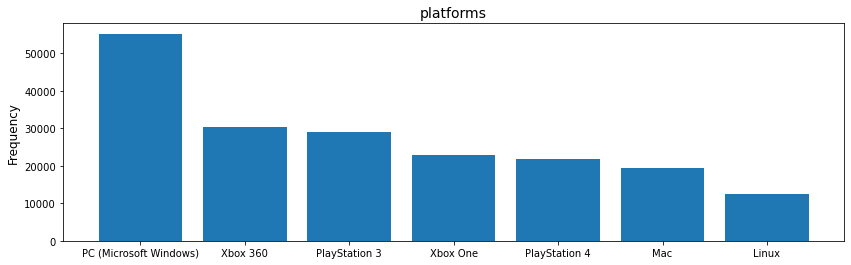

In [138]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(train["platforms"]).value_counts().iloc[:7].index,
        to_1D(train["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

>### changing ratings and changing to bins 

In [139]:
train.rating.value_counts()

70.000000    7837
80.000000    5523
60.000000    5031
50.000000    4393
75.266945    4135
             ... 
65.589566       1
70.251434       1
35.199444       1
43.200000       1
86.261660       1
Name: rating, Length: 5983, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

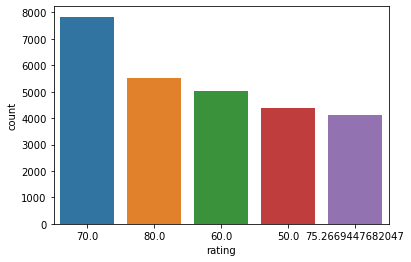

In [140]:
sns.countplot(x='rating', data=train, order=train.rating.value_counts().iloc[:5].index)

In [ ]:
# df2['rating_bin'] = pd.cut(df2.rating, 
#                            bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
#                            labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])


<AxesSubplot:xlabel='rating_bin', ylabel='count'>

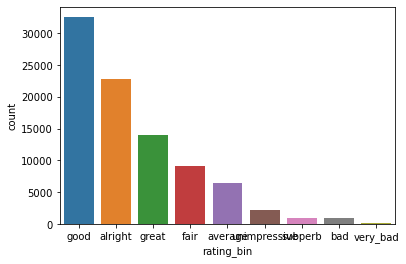

In [141]:
sns.countplot(x='rating_bin', data=train, order=train.rating_bin.value_counts().iloc[:9].index)

In [144]:
train.rating_bin

119606    alright
303752      great
277662       good
171022       fair
173310       good
           ...   
854       alright
296884      great
341913      great
349440    subperb
160188    alright
Name: rating_bin, Length: 88897, dtype: category
Categories (10, object): ['awful' < 'very_bad' < 'bad' < 'unimpressive' ... 'alright' < 'good' < 'great' < 'subperb']

## Exploring `good rating`

In [145]:
df_good_rating = train[train['rating_bin']== 'good']
df_good_rating.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
277662,5498,0,1393729268,"[54535, 74449, 93562, 122918, 213207, 1922905,...",1.384819e+09,[music],BandFuse: Rock Legends,"[PlayStation 3, Xbox 360]","[13282, 13283]","[18981, 37536, 63933, 67099, 67100, 68299, 727...",bandfuse-rock-legends,BandFuse: Rock Legends provides a pick up and ...,"[268435463, 536873065, 536875049, 536875157, 5...",1651609782,https://www.igdb.com/games/bandfuse-rock-legends,0d414545-0335-fb80-6b03-b6eb0f9ebbe3,"[48573, 67913]",5556.0,"[13311, 13312]","[11242, 11243, 11244, 11245, 11246]","[single-player, split-screen]",[Not available],[Not available],NaN,NaN,NaN,NaN,"[2153, 4137, 4245, 4345, 5031, 5287, 5305, 557...",NaN,NaN,80.000000,0.0,NaN,80.000000,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,5.0,[982],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982.0,True,False,False,True,0.0,False,9.0,False,6d0debd8-5be4-39fa-6572-a9e5ca90d85d,4.0,0.0,0.0,good
173310,4969,0,1391652059,"[13037, 56795, 74164, 80416, 80418, 93402, 934...",1.351555e+09,[adventure],LEGO The Lord of the Rings,"[Wii, PC (Microsoft Windows), PlayStation 3, X...","[11467, 11468, 11469, 11470, 11471, 11472, 114...","[3025, 3150, 3155, 4844, 7056, 9112, 9938, 143...",lego-the-lord-of-the-rings,Based on The Lord of the Rings motion picture ...,"[1, 27, 268435487, 536871008, 536871117, 53687...",1661395408,https://www.igdb.com/games/lego-the-lord-of-th...,fd515458-6838-dd1b-094c-a4cc987b55d5,"[13051, 49709]",94237.0,"[11981, 11983, 19866, 159880]","[6940, 20395, 20397, 41946, 41947]","[single-player, co-operative]",[Third person],"[Action, Comedy]","[45014, 51719, 51720, 66717]","[9078, 13136, 30954, 47947]",[5901],NaN,"[96, 205, 227, 296, 350, 410, 592, 1033, 1158,...",NaN,[7008],74.415688,125.0,"In LEGO The Lord of the Rings, the hobbit Frod...",75.930066,135.0,NaN,NaN,NaN,739.0,"[11, 51]",48.0,NaN,NaN,11.0,77.444444,10.0,"[857, 7945, 8391]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,857.0,True,True,False,True,0.0,False,12.0,False,109166e9-a40a-cf6c-1227-8f6269419142,2.0,0.0,0.0,good
422029,5924,10,1396725768,"[13991, 25594, 73637, 79381, 83140, 93098, 930...",1.318291e+09,"[hack-and-slash-beat-em-up, adventure]",Dead Rising 2: Off the Record,"[PC (Microsoft Windows), PlayStation 3, Xbox 3...","[14521, 14522, 14523, 56478, 56479]","[496, 571, 960, 2031, 3042, 4797, 5647, 9727, ...",dead-rising-2-off-the-record,"The new ""Off the Record"" storyline means an al...","[1, 19, 27, 33, 38, 268435481, 268435487, 5368...",1653549781,https://www.igdb.com/games/dead-rising-2-off-t...,213ffa44-2898-e50c-5700-518c2c3ea73a,"[5195, 13306, 69623]",84308.0,"[14233, 39367, 39368]","[102457, 102458, 102459, 102460, 102461]","[single-player, multiplayer, co-operative]",[Third person],"[Action, Horror, Comedy, Sandbox, Open world]","[18284, 52565, 66953, 121678]",NaN,[29937],NaN,"[5, 79, 121, 129, 271, 350, 510, 643, 904, 103...",NaN,[2186],70.963908,34.0,NaN,71.294454,45.0,NaN,NaN,NaN,579.0,NaN,17.0,"[23907, 47475]",496.0,NaN,71.625000,11.0,[645],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,645.0,True,True,False,False,0.0,True,6.0,False,2ac7e36a-848c-c2b4-74de-ddab12b82326,0.0,2.0,0.0,good
185759,1374,0,1348924195,"[14010, 56799, 73717, 79721, 79722, 84279, 931...

Text(0.5, 1.0, 'platforms')

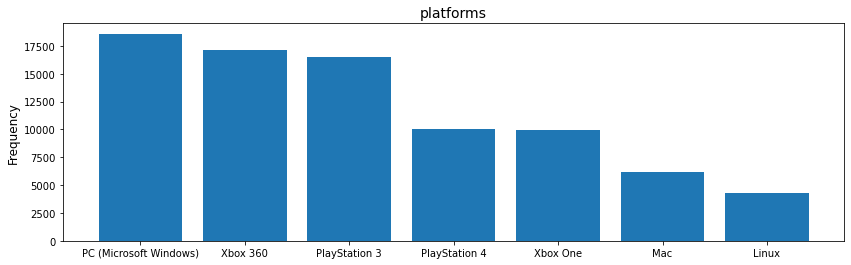

In [146]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- for the ratings "good" the most used platforms is (in order) pc, xbox 360, ps3, ps4

##  Exploring `suberb raitng`

In [147]:
df_subperb_rating = train[train['rating_bin']== 'subperb']
df_subperb_rating.head(3)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
182585,732,0,1317748966,"[14740, 17904, 72864, 85113, 94603, 96695, 150...",1.098749e+09,"[shooter, racing, adventure]",Grand Theft Auto: San Andreas,"[PC (Microsoft Windows), PlayStation 2, PlaySt...","[1613, 1614, 3317, 3318, 48660, 55583, 123523,...","[564, 730, 731, 733, 1020, 1121, 3262, 3263, 3...",grand-theft-auto-san-andreas,Returning after his mother's murder to the sem...,"[1, 32, 38, 268435461, 268435466, 268435487, 5...",1663808291,https://www.igdb.com/games/grand-theft-auto-sa...,7b750309-4ad5-3573-45cb-6ac5fe643331,"[31849, 47915, 47916, 47917, 47918, 47919, 47920]",120933.0,"[55974, 55979, 55980]","[679, 189150, 189151, 189152, 189153, 778550, ...","[single-player, co-operative]","[First person, Third person]","[Action, Non-fiction, Open world]","[12921, 12922, 12923, 12924, 12925, 12926, 670...","[2332, 6795, 52703, 52704]",[34971],[41],"[11, 17, 21, 57, 58, 72, 79, 109, 129, 132, 15...",NaN,"[19022, 19023]",90.262586,2398.0,"Five years ago, Carl Johnson escaped from the ...",91.702721,2405.0,NaN,NaN,2.0,847.0,[493],991.0,[5850],NaN,NaN,93.142857,7.0,[1858],NaN,NaN,NaN,NaN,NaN,[178126],NaN,NaN,NaN,NaN,NaN,1858.0,False,False,False,True,0.0,False,8.0,False,b2572d9b-fe16-f867-de9f-9c93df25ad7d,2.0,0.0,0.0,subperb
349636,2617,3,1374077349,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",the-settlers-ii-gold-edition,The goal of this game is to build a prosperous...,"[22, 268435467, 268435469, 268435471, 53687097...",1657539050,https://www.igdb.com/games/the-settlers-ii-gol...,db85c417-67eb-2742-d6d1-f80aad673a6a,"[27816, 78303]",99902.0,[97957],"[22965, 383044, 383045, 383046]","[single-player, multiplayer, split-screen]",[Bird view / Isometric],[Historical],"[119754, 139873]",[32095],NaN,NaN,"[60, 64, 171, 606, 994, 1148, 1471, 1922, 2002...",NaN,[35570],92.221300,36.0,After fighting a losing battle with the raging...,92.221300,36.0,2596.0,Gold Edition,NaN,619.0,[2165],22.0,NaN,NaN,NaN,NaN,NaN,[7365],NaN,NaN,[86493],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7365.0,False,False,False,False,0.0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0.0,0.0,0.0,subperb
389916,6440,0,1398419293,"[28211, 74916, 115817, 219004, 246341, 1929988...",1.412986e+09,"[role-playing-rpg, adventure]",Monster Hunter 4 Ultimate,[Nintendo 3DS],"[25676, 25677, 25678, 129943]","[6, 121, 125, 472, 1879, 2155, 2368, 2480, 396...",monster-hunter-4-ultimate,Monster Hunter 4 Ultimate (called Monster Hunt...,"[1, 17, 33, 268435468, 268435487, 536870976, 5...",1649677356,https://www.igdb.com/games/monster-hunter-4-ul...,c6166764-b398-84d2-7c62-15284e69f71e,"[5960, 5961]",114788.0,[15331],"[5138, 5139, 5140, 5141, 5142, 166087, 166088,...","[single-player, multiplayer]",[Third person],"[Action, Fantasy, Sandbox]","[1555, 64540, 64541]","[12016, 19202, 19912, 19913, 48648, 48649, 48650]",[73494],NaN,"[64, 87, 121, 129, 227, 236, 296, 301, 332, 38...",NaN,"[17294, 17295, 17296, 17297, 17298, 17299, 173...",90.702176,39.0,NaN,89.172516,55.0,NaN,NaN,1.0,2948.0,[824],17.0,NaN,NaN,NaN,87.642857,16.0,[7104],NaN

> ### Most frequent platforms in the raiting `subperb`

Text(0.5, 1.0, 'platforms')

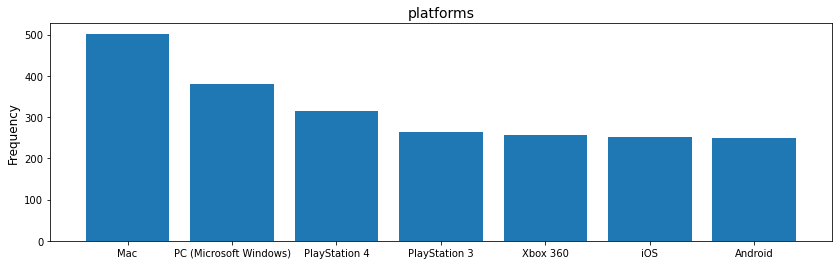

In [148]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- suberb rating is mostly mac and PC top two, and mest three are ps4 and ps3.

## Exploring `great rating`

In [149]:
df_great_rating = train[train['rating_bin']== 'great']
df_great_rating.head(3)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
303752,7111,0,1401334660,"[56034, 72961, 81282, 92782, 133859, 213909, 1...",1.247530e+09,"[simulator, sport]",NCAA Football 10,"[PlayStation 2, PlayStation 3, Xbox 360, PlayS...","[17892, 17893, 17894, 17895, 108315]","[5065, 5953, 5955, 5956, 7112, 7113, 7114, 308...",ncaa-football-10,NCAA Football 10 is a college football video g...,"[268435469, 268435470, 536870938, 536870939, 5...",1649513078,https://www.igdb.com/games/ncaa-football-10,e9acb692-7309-9482-c401-ed16118d0966,[4096],136621.0,"[16802, 16803, 16804]",[27115],"[single-player, multiplayer, split-screen]",[Third person],[Not available],NaN,NaN,NaN,NaN,"[26, 27, 32, 274, 680, 810, 1148, 1166, 1293, ...",NaN,NaN,90.000000,3.0,NaN,90.000000,5.0,NaN,NaN,NaN,2195.0,[222],NaN,NaN,NaN,222.0,90.000000,2.0,"[1903, 1904]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,False,False,False,True,0.0,False,9.0,False,d703c441-9ce1-db3e-503a-27569d05d4c2,2.0,0.0,0.0,great
408813,1352,0,1348913147,"[74086, 80281, 80282, 128162, 189677, 245462, ...",1.331597e+09,"[platform, adventure, indie]",Journey,"[PC (Microsoft Windows), PlayStation 3, iOS, P...","[103757, 103758, 103759, 170234, 174013, 17401...","[7344, 7406, 18182, 19150, 22387, 24426, 26226...",journey,A third-person adventure game in which the pla...,"[17, 268435464, 268435487, 268435488, 53687098...",1663592291,https://www.igdb.com/games/journey,675fdd74-3b13-4188-6413-fba3f3434090,"[7111, 33547]",80666.0,"[107802, 107804, 110636, 180654]","[1974, 1975, 1976, 1977, 1978, 404213, 404214,...","[single-player, co-operative]","[Third person, Side view]",[Fantasy],"[110841, 110842, 110843, 110844, 112851, 11285...",NaN,"[2794, 2795, 2796, 2797, 2798, 2799, 2800, 280...",[174],"[72, 117, 296, 532, 617, 992, 1027, 1079, 1098...",NaN,"[6942, 6943]",86.471883,807.0,Journey‍ '​s story is told wordlessly through ...,90.164513,822.0,NaN,NaN,NaN,NaN,NaN,296.0,[23411],NaN,NaN,93.857143,15.0,[826],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,826.0,True,True,False,False,0.0,True,9.0,False,2f8c569a-dc18-97f1-7de4-4809862d4264,0.0,2.0,0.0,great
388080,11219,3,1434573123,[1313699],7.824384e+08,[platform],Sonic the Hedgehog 3 & Knuckles,"[PC (Microsoft Windows), Sega Mega Drive/Genesis]","[196174, 212504]","[19150, 19164, 24426, 26820, 28070, 29032, 962...",sonic-the-hedgehog-3-and-knuckles,Sonic the Hedgehog 3 & Knuckles (or simply Son...,"[1, 17, 268435464, 536871075, 536871880, 53687...",1662980255,https://www.igdb.com/games/sonic-the-hedgehog-...,2a8eb19c-40b5-b320-5453-4afbd2852fff,"[30339, 30340]",137778.0,"[109458, 109459]","[39278, 39279, 39280, 39281, 39282]","[single-player, multiplayer, co-operative, spl...",[Side view],"[Action, Fantasy]","[17743, 140904, 154748, 154749, 154750, 154751...","[49978, 49979]","[74783, 74784, 74785, 74786, 74787, 74788, 747...",NaN,"[163, 968, 1052, 1127, 3014, 17073, 21757, 248...",NaN,[41204],89.631895,96.0,"At the end of Sonic the Hedgehog 2, the evil D...",89.631895,96.0,NaN,NaN,NaN,2156.0,[457],36.0,"[4157, 20502, 22297, 50924, 192196, 210301]",NaN,NaN,NaN,NaN,[10539],NaN,NaN,NaN,NaN,NaN,[206597],NaN,NaN,NaN,NaN,NaN,10539.0,True,False,False,True,2.0,False,29.0,True,2cdb69f3-c45a-4bb0-377f-573cd77848b3,2

Text(0.5, 1.0, 'platforms')

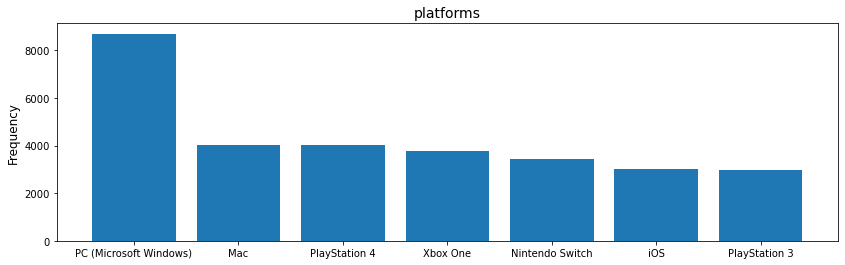

In [150]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [151]:

df_top3_rating = train[(train['rating_bin']== 'great') | (train['rating_bin']== 'good') | (train['rating_bin']== 'subperb')]
df_top3_rating.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
303752,7111,0,1401334660,"[56034, 72961, 81282, 92782, 133859, 213909, 1...",1.247530e+09,"[simulator, sport]",NCAA Football 10,"[PlayStation 2, PlayStation 3, Xbox 360, PlayS...","[17892, 17893, 17894, 17895, 108315]","[5065, 5953, 5955, 5956, 7112, 7113, 7114, 308...",ncaa-football-10,NCAA Football 10 is a college football video g...,"[268435469, 268435470, 536870938, 536870939, 5...",1649513078,https://www.igdb.com/games/ncaa-football-10,e9acb692-7309-9482-c401-ed16118d0966,[4096],136621.0,"[16802, 16803, 16804]",[27115],"[single-player, multiplayer, split-screen]",[Third person],[Not available],NaN,NaN,NaN,NaN,"[26, 27, 32, 274, 680, 810, 1148, 1166, 1293, ...",NaN,NaN,90.0,3.0,NaN,90.0,5.0,NaN,NaN,NaN,2195.0,[222],NaN,NaN,NaN,222.0,90.0,2.0,"[1903, 1904]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,False,False,False,True,0.0,False,9.0,False,d703c441-9ce1-db3e-503a-27569d05d4c2,2.0,0.0,0.0,great


## These are the top 7 platforms for the three best ratings (good, great, subperb)

Text(0.5, 1.0, 'platforms')

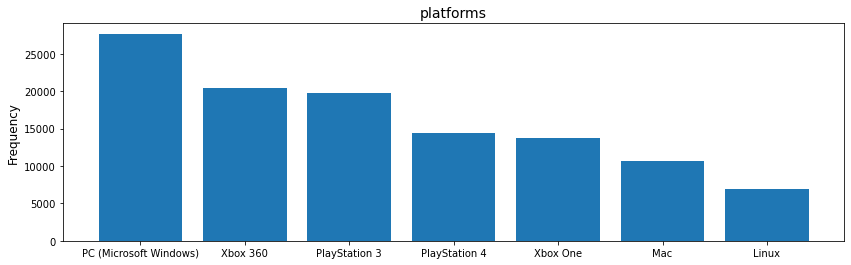

In [152]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - X-Box 360
    - ps 3 and 4 
    - X-box 1

## These are the top 7 platforms for the lowest  ratings (bad, very bad , awful)

In [157]:
df_low3_rating = df2[(df2['rating_bin']== 'bad') | (df2['rating_bin']== 'very bad') | (df2['rating_bin']== 'awful')]
df_low3_rating.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
1909,30886,0,1495497600,"[2456, 1993129]",1.480982e+09,"[adventure, indie]",Time Of Silence,[PC (Microsoft Windows)],[73864],"[28277, 37419, 55282, 75948, 81275, 106992, 10...",time-of-silence,Fascinating atmosphere of darkness and frighte...,"[268435487, 268435488]",1604620800,https://www.igdb.com/games/time-of-silence,632f6a8e-3535-63b1-b6dc-314b280486b5,NaN,NaN,NaN,"[74232, 74233, 74234, 74235, 74236]",[single-player],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,0.0,NaN,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,bad


Text(0.5, 1.0, 'platforms')

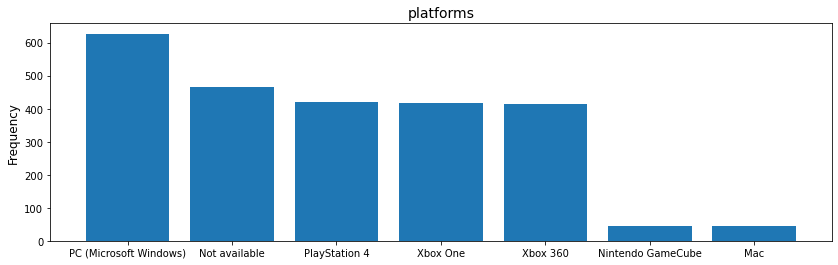

In [158]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

# Q2- what is the most common genre in games that are `subperb` (the highest rating)

- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

In [159]:
df_subperb_rating

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
182585,732,0,1317748966,"[14740, 17904, 72864, 85113, 94603, 96695, 150...",1.098749e+09,"[shooter, racing, adventure]",Grand Theft Auto: San Andreas,"[PC (Microsoft Windows), PlayStation 2, PlaySt...","[1613, 1614, 3317, 3318, 48660, 55583, 123523,...","[564, 730, 731, 733, 1020, 1121, 3262, 3263, 3...",grand-theft-auto-san-andreas,Returning after his mother's murder to the sem...,"[1, 32, 38, 268435461, 268435466, 268435487, 5...",1663808291,https://www.igdb.com/games/grand-theft-auto-sa...,7b750309-4ad5-3573-45cb-6ac5fe643331,"[31849, 47915, 47916, 47917, 47918, 47919, 47920]",120933.0,"[55974, 55979, 55980]","[679, 189150, 189151, 189152, 189153, 778550, ...","[single-player, co-operative]","[First person, Third person]","[Action, Non-fiction, Open world]","[12921, 12922, 12923, 12924, 12925, 12926, 670...","[2332, 6795, 52703, 52704]",[34971],[41],"[11, 17, 21, 57, 58, 72, 79, 109, 129, 132, 15...",NaN,"[19022, 19023]",90.262586,2398.0,"Five years ago, Carl Johnson escaped from the ...",91.702721,2405.0,NaN,NaN,2.0,847.0,[493],991.0,[5850],NaN,NaN,93.142857,7.0,[1858],NaN,NaN,NaN,NaN,NaN,[178126],NaN,NaN,NaN,NaN,NaN,1858.0,False,False,False,True,0.0,False,8.0,False,b2572d9b-fe16-f867-de9f-9c93df25ad7d,2.0,0.0,0.0,subperb
349636,2617,3,1374077349,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",the-settlers-ii-gold-edition,The goal of this game is to build a prosperous...,"[22, 268435467, 268435469, 268435471, 53687097...",1657539050,https://www.igdb.com/games/the-settlers-ii-gol...,db85c417-67eb-2742-d6d1-f80aad673a6a,"[27816, 78303]",99902.0,[97957],"[22965, 383044, 383045, 383046]","[single-player, multiplayer, split-screen]",[Bird view / Isometric],[Historical],"[119754, 139873]",[32095],NaN,NaN,"[60, 64, 171, 606, 994, 1148, 1471, 1922, 2002...",NaN,[35570],92.221300,36.0,After fighting a losing battle with the raging...,92.221300,36.0,2596.0,Gold Edition,NaN,619.0,[2165],22.0,NaN,NaN,NaN,NaN,NaN,[7365],NaN,NaN,[86493],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7365.0,False,False,False,False,0.0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0.0,0.0,0.0,subperb
389916,6440,0,1398419293,"[28211, 74916, 115817, 219004, 246341, 1929988...",1.412986e+09,"[role-playing-rpg, adventure]",Monster Hunter 4 Ultimate,[Nintendo 3DS],"[25676, 25677, 25678, 129943]","[6, 121, 125, 472, 1879, 2155, 2368, 2480, 396...",monster-hunter-4-ultimate,Monster Hunter 4 Ultimate (called Monster Hunt...,"[1, 17, 33, 268435468, 268435487, 536870976, 5...",1649677356,https://www.igdb.com/games/monster-hunter-4-ul...,c6166764-b398-84d2-7c62-15284e69f71e,"[5960, 5961]",114788.0,[15331],"[5138, 5139, 5140, 5141, 5142, 166087, 166088,...","[single-player, multiplayer]",[Third person],"[Action, Fantasy, Sandbox]","[1555, 64540, 64541]","[12016, 19202, 19912, 19913, 48648, 48649, 48650]",[73494],NaN,"[64, 87, 121, 129, 227, 236, 296, 301, 332, 38...",NaN,"[17294, 17295, 17296, 17297, 17298, 17299, 173...",90.702176,39.0,NaN,89.172516,55.0,NaN,NaN,1.0,2948.0,[824],17.0,NaN,NaN,NaN,87.642857,16.0,[7104],NaN

Text(0.5, 1.0, 'genre')

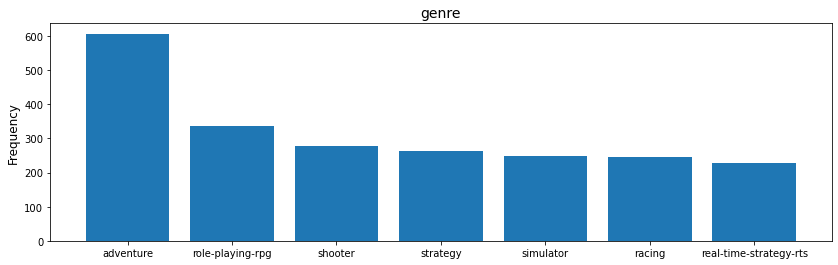

In [153]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_subperb_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genre", size = 14)

>- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

## Q 2.1 what about the three highest ratings (good, great, subperb) ? what is the overall most highest genre

Text(0.5, 1.0, 'genres')

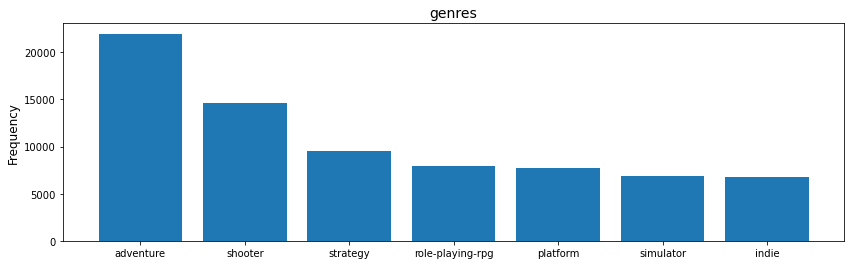

In [154]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

## Q 2.2 what about the three lowest ratings ((bad, very bad , awful)) ? what is the overall most highest genre in these low rating games?

Text(0.5, 1.0, 'platforms')

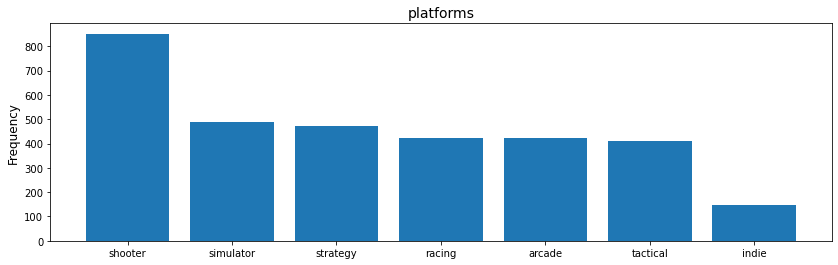

In [160]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

# Q3- what is the most common theme in games that are subperb (the highest rating)

Answer - the most common themes in the subperb is action, fantasy, science fiction, historical.

Text(0.5, 1.0, 'themes')

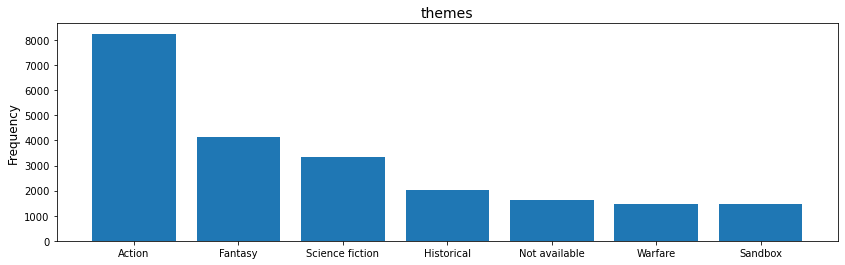

In [161]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_great_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_great_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("themes", size = 14)

## Q3.1- what is the most common theme in games that are three highest ratings (good, great, subperb)?

Text(0.5, 1.0, 'Themes')

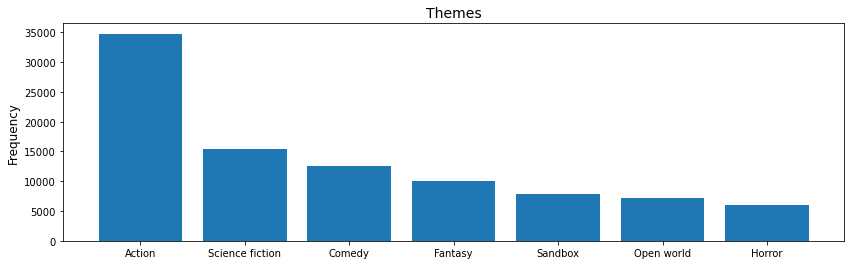

In [162]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

## Q3.1- what is the most common theme in games that are three lowest ratings ((bad, very bad , awful)) ?

Text(0.5, 1.0, 'Themes')

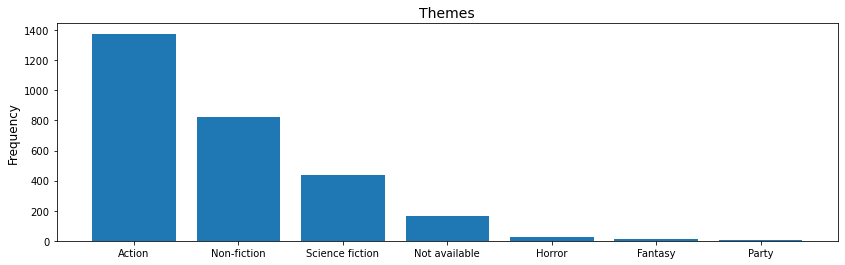

In [163]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

# Q4-  Do users rate games with online multiplayer modes higher than games that lack online multiplayer modes?

> since there is a gap time from game that can be played online and games that cannot- we decided to remove that gap and make sure that the games all come out in the same time period


### _answer:_ even after removing that time gap the games that are `NOT` multiplayer online games are rated higher than non-multiplayer games

In [164]:
df2.head(2)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
16,18248,0,1457458737,"[30063, 130024, 1743759, 1921917]",1.271722e+09,[music],Beat City,[Nintendo DS],"[47952, 47953]","[11711, 18981, 54774, 63933, 67774, 77720, 789...",beat-city,A rhythm-based mini-game collection for the DS...,"[1, 268435463, 536871080, 536871186, 536875049...",1652301864,https://www.igdb.com/games/beat-city,62fa1b35-b89c-e933-f820-ff2d3e21a2c9,"[8122, 8123]",201029.0,"[164713, 164714]","[740229, 740230]",[single-player],[Side view],[Action],NaN,NaN,NaN,NaN,"[168, 274, 4137, 4328]",NaN,NaN,60.00000,0.0,"Can you feel the beat? Life, color, and happin...",60.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,fair
23,100789,0,1525651200,"[679587, 679684, 1991025]",NaN,"[sport, arcade]",Flying Arrow!.,[Not available],NaN,"[14733, 87053, 90965, 109606, 116349, 116350, ...",flying-arrow--1,Flying Arrow is a game control throw your arro...,"[268435470, 268435489]",1604620800,https://www.igdb.com/games/flying-arrow--1,ecaba399-d6af-1a0a-5a4a-f1a08995382c,[21881],NaN,NaN,NaN,[Not available],[Not available],[Not available],[78501],NaN,NaN,NaN,NaN,NaN,NaN,34.16185,0.0,NaN,34.16185,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,unimpressive


>## Not online multi

In [165]:
#making sure all games are comming out of the same time period
train['created_at'] = pd.to_datetime(train['created_at'],unit='s')

In [166]:
train.onlinecoop.value_counts()

False    53773
True     35124
Name: onlinecoop, dtype: int64

In [167]:
NOT_online_multi = train[train['onlinecoop']== False]
NOT_online_multi.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
303752,7111,0,2014-05-29 03:37:40,"[56034, 72961, 81282, 92782, 133859, 213909, 1...",1.247530e+09,"[simulator, sport]",NCAA Football 10,"[PlayStation 2, PlayStation 3, Xbox 360, PlayS...","[17892, 17893, 17894, 17895, 108315]","[5065, 5953, 5955, 5956, 7112, 7113, 7114, 308...",ncaa-football-10,NCAA Football 10 is a college football video g...,"[268435469, 268435470, 536870938, 536870939, 5...",1649513078,https://www.igdb.com/games/ncaa-football-10,e9acb692-7309-9482-c401-ed16118d0966,[4096],136621.0,"[16802, 16803, 16804]",[27115],"[single-player, multiplayer, split-screen]",[Third person],[Not available],NaN,NaN,NaN,NaN,"[26, 27, 32, 274, 680, 810, 1148, 1166, 1293, ...",NaN,NaN,90.0,3.0,NaN,90.0,5.0,NaN,NaN,NaN,2195.0,[222],NaN,NaN,NaN,222.0,90.0,2.0,"[1903, 1904]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,False,False,False,True,0.0,False,9.0,False,d703c441-9ce1-db3e-503a-27569d05d4c2,2.0,0.0,0.0,great


In [168]:
NOT_online_multi['first_release_date'] = pd.to_datetime(NOT_online_multi['first_release_date'],unit='s')

/var/folders/f1/8blv52r50y1cffy2qpp05b5c0000gn/T/ipykernel_55367/1594284749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOT_online_multi['first_release_date'] = pd.to_datetime(NOT_online_multi['first_release_date'],unit='s')


In [169]:
NOT_online_multi.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
303752,7111,0,2014-05-29 03:37:40,"[56034, 72961, 81282, 92782, 133859, 213909, 1...",2009-07-14,"[simulator, sport]",NCAA Football 10,"[PlayStation 2, PlayStation 3, Xbox 360, PlayS...","[17892, 17893, 17894, 17895, 108315]","[5065, 5953, 5955, 5956, 7112, 7113, 7114, 308...",ncaa-football-10,NCAA Football 10 is a college football video g...,"[268435469, 268435470, 536870938, 536870939, 5...",1649513078,https://www.igdb.com/games/ncaa-football-10,e9acb692-7309-9482-c401-ed16118d0966,[4096],136621.0,"[16802, 16803, 16804]",[27115],"[single-player, multiplayer, split-screen]",[Third person],[Not available],NaN,NaN,NaN,NaN,"[26, 27, 32, 274, 680, 810, 1148, 1166, 1293, ...",NaN,NaN,90.000000,3.0,NaN,90.000000,5.0,NaN,NaN,NaN,2195.0,[222],NaN,NaN,NaN,222.0,90.000000,2.0,"[1903, 1904]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,False,False,False,True,0.0,False,9.0,False,d703c441-9ce1-db3e-503a-27569d05d4c2,2.0,0.0,0.0,great
277662,5498,0,2014-03-02 03:01:08,"[54535, 74449, 93562, 122918, 213207, 1922905,...",2013-11-19,[music],BandFuse: Rock Legends,"[PlayStation 3, Xbox 360]","[13282, 13283]","[18981, 37536, 63933, 67099, 67100, 68299, 727...",bandfuse-rock-legends,BandFuse: Rock Legends provides a pick up and ...,"[268435463, 536873065, 536875049, 536875157, 5...",1651609782,https://www.igdb.com/games/bandfuse-rock-legends,0d414545-0335-fb80-6b03-b6eb0f9ebbe3,"[48573, 67913]",5556.0,"[13311, 13312]","[11242, 11243, 11244, 11245, 11246]","[single-player, split-screen]",[Not available],[Not available],NaN,NaN,NaN,NaN,"[2153, 4137, 4245, 4345, 5031, 5287, 5305, 557...",NaN,NaN,80.000000,0.0,NaN,80.000000,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,5.0,[982],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982.0,True,False,False,True,0.0,False,9.0,False,6d0debd8-5be4-39fa-6572-a9e5ca90d85d,4.0,0.0,0.0,good
173310,4969,0,2014-02-06 02:00:59,"[13037, 56795, 74164, 80416, 80418, 93402, 934...",2012-10-30,[adventure],LEGO The Lord of the Rings,"[Wii, PC (Microsoft Windows), PlayStation 3, X...","[11467, 11468, 11469, 11470, 11471, 11472, 114...","[3025, 3150, 3155, 4844, 7056, 9112, 9938, 143...",lego-the-lord-of-the-rings,Based on The Lord of the Rings motion picture ...,"[1, 27, 268435487, 536871008, 536871117, 53687...",1661395408,https://www.igdb.com/games/lego-the-lord-of-th...,fd515458-6838-dd1b-094c-a4cc987b55d5,"[13051, 49709]",94237.0,"[11981, 11983, 19866, 159880]","[6940, 20395, 20397, 41946, 41947]","[single-player, co-operative]",[Third person],"[Action, Comedy]","[45014, 51719, 51720, 66717]","[9078, 13136, 30954, 47947]",[5901],NaN,"[96, 205, 227, 296, 350, 410, 592, 1033, 1158,...",NaN,[7008],74.415688,125.0,"In LEGO The Lord of the Rings, the hobbit Frod...",75.930066,135.0,NaN,NaN,NaN,739.0,"[11, 51]",48.0,NaN,NaN,11.0,77.444444,10.0,"[857, 7945, 8391]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,857.0,True,True,False,True,0.0,False,12.0,False,109166e9-a40a-cf6c-1227-8f6269419142,2.0,0.0,0.0,good
298032,17463,0,2016-02-09 18:51:04,"[29019, 73234, 132427, 217578, 1191624]",2009-10-29,[role-playing-rpg],Final Fantasy: The 4 Heroes of Light,[Nintendo DS],"[139451, 139452, 155061]","[19127, 22790, 57033, 69007, 96217, 99118

In [170]:
NOT_online_multi.first_release_date.value_counts()

2011-02-17    3000
1994-08-01    1598
2017-07-31     687
2018-12-11     472
2015-07-17     471
              ... 
1995-05-24       1
2011-05-04       1
1999-10-15       1
2002-11-11       1
2006-11-09       1
Name: first_release_date, Length: 5166, dtype: int64

In [171]:
NOT_online_multi['first_release_date_year'] = NOT_online_multi.first_release_date.dt.year

/var/folders/f1/8blv52r50y1cffy2qpp05b5c0000gn/T/ipykernel_55367/711514001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOT_online_multi['first_release_date_year'] = NOT_online_multi.first_release_date.dt.year


In [172]:
NOT_online_multi.first_release_date_year.value_counts()

2011.0    6173
2017.0    5032
2016.0    4625
2012.0    3470
2018.0    3019
2015.0    2917
2013.0    2564
2010.0    2414
1994.0    2155
2008.0    1903
2014.0    1807
2009.0    1756
2019.0    1667
2004.0    1571
2002.0    1381
2003.0    1097
2006.0     966
2001.0     856
1999.0     847
1996.0     811
2007.0     718
2005.0     685
1998.0     555
1995.0     544
2020.0     474
2000.0     362
1997.0     340
1992.0     333
1991.0     330
1990.0     328
1985.0     234
2021.0     137
1993.0     122
1989.0      67
1987.0      46
2022.0      45
1988.0      40
1986.0      33
1984.0      31
1982.0      28
1983.0      17
1981.0      10
1980.0       5
1979.0       5
1978.0       3
1977.0       2
1972.0       1
1958.0       1
1973.0       1
1975.0       1
Name: first_release_date_year, dtype: int64

In [173]:
NOT_online_multi.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin,first_release_date_year
303752,7111,0,2014-05-29 03:37:40,"[56034, 72961, 81282, 92782, 133859, 213909, 1...",2009-07-14,"[simulator, sport]",NCAA Football 10,"[PlayStation 2, PlayStation 3, Xbox 360, PlayS...","[17892, 17893, 17894, 17895, 108315]","[5065, 5953, 5955, 5956, 7112, 7113, 7114, 308...",ncaa-football-10,NCAA Football 10 is a college football video g...,"[268435469, 268435470, 536870938, 536870939, 5...",1649513078,https://www.igdb.com/games/ncaa-football-10,e9acb692-7309-9482-c401-ed16118d0966,[4096],136621.0,"[16802, 16803, 16804]",[27115],"[single-player, multiplayer, split-screen]",[Third person],[Not available],NaN,NaN,NaN,NaN,"[26, 27, 32, 274, 680, 810, 1148, 1166, 1293, ...",NaN,NaN,90.000000,3.0,NaN,90.000000,5.0,NaN,NaN,NaN,2195.0,[222],NaN,NaN,NaN,222.0,90.000000,2.0,"[1903, 1904]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,False,False,False,True,0.0,False,9.0,False,d703c441-9ce1-db3e-503a-27569d05d4c2,2.0,0.0,0.0,great,2009.0
277662,5498,0,2014-03-02 03:01:08,"[54535, 74449, 93562, 122918, 213207, 1922905,...",2013-11-19,[music],BandFuse: Rock Legends,"[PlayStation 3, Xbox 360]","[13282, 13283]","[18981, 37536, 63933, 67099, 67100, 68299, 727...",bandfuse-rock-legends,BandFuse: Rock Legends provides a pick up and ...,"[268435463, 536873065, 536875049, 536875157, 5...",1651609782,https://www.igdb.com/games/bandfuse-rock-legends,0d414545-0335-fb80-6b03-b6eb0f9ebbe3,"[48573, 67913]",5556.0,"[13311, 13312]","[11242, 11243, 11244, 11245, 11246]","[single-player, split-screen]",[Not available],[Not available],NaN,NaN,NaN,NaN,"[2153, 4137, 4245, 4345, 5031, 5287, 5305, 557...",NaN,NaN,80.000000,0.0,NaN,80.000000,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,5.0,[982],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,982.0,True,False,False,True,0.0,False,9.0,False,6d0debd8-5be4-39fa-6572-a9e5ca90d85d,4.0,0.0,0.0,good,2013.0
173310,4969,0,2014-02-06 02:00:59,"[13037, 56795, 74164, 80416, 80418, 93402, 934...",2012-10-30,[adventure],LEGO The Lord of the Rings,"[Wii, PC (Microsoft Windows), PlayStation 3, X...","[11467, 11468, 11469, 11470, 11471, 11472, 114...","[3025, 3150, 3155, 4844, 7056, 9112, 9938, 143...",lego-the-lord-of-the-rings,Based on The Lord of the Rings motion picture ...,"[1, 27, 268435487, 536871008, 536871117, 53687...",1661395408,https://www.igdb.com/games/lego-the-lord-of-th...,fd515458-6838-dd1b-094c-a4cc987b55d5,"[13051, 49709]",94237.0,"[11981, 11983, 19866, 159880]","[6940, 20395, 20397, 41946, 41947]","[single-player, co-operative]",[Third person],"[Action, Comedy]","[45014, 51719, 51720, 66717]","[9078, 13136, 30954, 47947]",[5901],NaN,"[96, 205, 227, 296, 350, 410, 592, 1033, 1158,...",NaN,[7008],74.415688,125.0,"In LEGO The Lord of the Rings, the hobbit Frod...",75.930066,135.0,NaN,NaN,NaN,739.0,"[11, 51]",48.0,NaN,NaN,11.0,77.444444,10.0,"[857, 7945, 8391]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,857.0,True,True,False,True,0.0,False,12.0,False,109166e9-a40a-cf6c-1227-8f6269419142,2.0,0.0,0.0,good,2012.0
298032,17463,0,2016-02-09 18:51:04,"[29019, 73234, 132427, 217578, 1191624]",2009-10-29,[role-playing-rpg],Final Fantasy: The 4 Heroes of Light,[Nintendo DS],"[139451, 139452, 155061

In [ ]:
#1981 is the lowest date in online i will it cut it off there 

In [174]:
NOT_online_multi = NOT_online_multi[NOT_online_multi['first_release_date_year'] > 1981.0]
NOT_online_multi.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin,first_release_date_year
303752,7111,0,2014-05-29 03:37:40,"[56034, 72961, 81282, 92782, 133859, 213909, 1...",2009-07-14,"[simulator, sport]",NCAA Football 10,"[PlayStation 2, PlayStation 3, Xbox 360, PlayS...","[17892, 17893, 17894, 17895, 108315]","[5065, 5953, 5955, 5956, 7112, 7113, 7114, 308...",ncaa-football-10,NCAA Football 10 is a college football video g...,"[268435469, 268435470, 536870938, 536870939, 5...",1649513078,https://www.igdb.com/games/ncaa-football-10,e9acb692-7309-9482-c401-ed16118d0966,[4096],136621.0,"[16802, 16803, 16804]",[27115],"[single-player, multiplayer, split-screen]",[Third person],[Not available],NaN,NaN,NaN,NaN,"[26, 27, 32, 274, 680, 810, 1148, 1166, 1293, ...",NaN,NaN,90.0,3.0,NaN,90.0,5.0,NaN,NaN,NaN,2195.0,[222],NaN,NaN,NaN,222.0,90.0,2.0,"[1903, 1904]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,False,False,False,True,0.0,False,9.0,False,d703c441-9ce1-db3e-503a-27569d05d4c2,2.0,0.0,0.0,great,2009.0


In [175]:
NOT_online_multi.first_release_date_year.value_counts()

2011.0    6173
2017.0    5032
2016.0    4625
2012.0    3470
2018.0    3019
2015.0    2917
2013.0    2564
2010.0    2414
1994.0    2155
2008.0    1903
2014.0    1807
2009.0    1756
2019.0    1667
2004.0    1571
2002.0    1381
2003.0    1097
2006.0     966
2001.0     856
1999.0     847
1996.0     811
2007.0     718
2005.0     685
1998.0     555
1995.0     544
2020.0     474
2000.0     362
1997.0     340
1992.0     333
1991.0     330
1990.0     328
1985.0     234
2021.0     137
1993.0     122
1989.0      67
1987.0      46
2022.0      45
1988.0      40
1986.0      33
1984.0      31
1982.0      28
1983.0      17
Name: first_release_date_year, dtype: int64

## Not online multi-player that games are after 1981

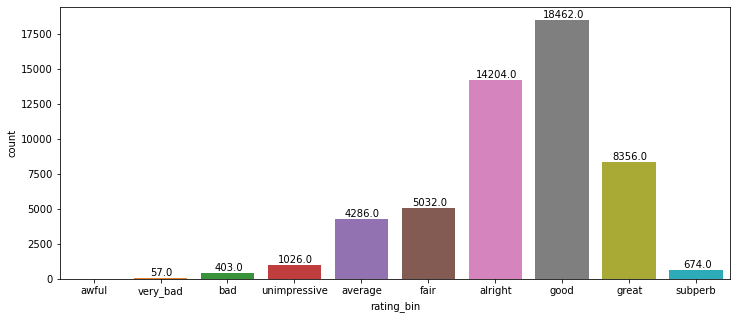

In [176]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=NOT_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

>##  online multi

In [177]:
df_online_multi = df2[df2['onlinecoop']== True]
df_online_multi.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
117,984,0,1322235753,"[36688, 73278, 73279, 73472, 84030, 128697, 21...",1.283472e+09,"[simulator, adventure]",Tom Clancy's H.A.W.X 2,"[Wii, PC (Microsoft Windows), PlayStation 3, X...","[2399, 2400, 3109, 3110, 106460, 106461, 106462]","[276, 587, 649, 662, 848, 2150, 5476, 9763, 14...",tom-clancy-s-h-a-w-x-2,Aerial warfare has evolved. So have you. As a ...,"[1, 17, 22, 268435469, 268435487, 536870913, 5...",1657613758,https://www.igdb.com/games/tom-clancy-s-h-a-w-x-2,9344eee5-3711-5468-134d-4d56bb167ad7,"[42377, 64150, 78504]",91638.0,[2370],"[586, 587, 588, 589, 590]","[single-player, multiplayer]",[First person],"[Action, Fantasy, Historical]","[199, 11506, 188178, 188179]","[66159, 66160, 94859]",NaN,NaN,"[1, 21, 25, 36, 56, 65, 304, 992, 1158, 1186, ...",NaN,NaN,60.215222,13.0,You will do so by mastering every nuance of th...,56.190944,22.0,NaN,NaN,NaN,221.0,[857],3.0,NaN,NaN,NaN,52.166667,9.0,[521],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521.0,True,True,True,False,0.0,True,9.0,False,fdf0abc1-136f-121e-8d97-98d254c4ca01,0.0,4.0,0.0,alright


## Games that are after 1981 Ratings 

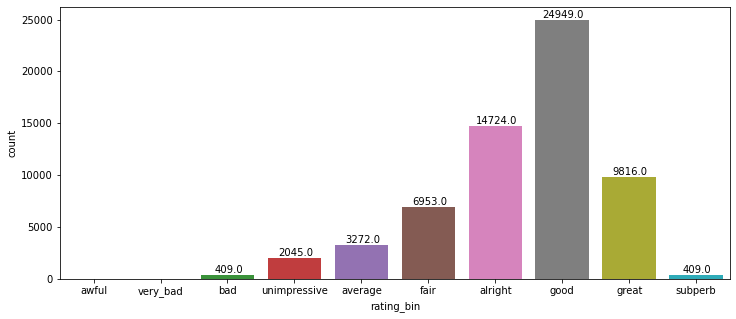

In [178]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=df_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

### figuring out the time period for online games

In [ ]:
df_online_multi['first_release_date'] = pd.to_datetime(df_online_multi['first_release_date'],unit='s')

In [ ]:
df_online_multi.head(1)

In [ ]:
df_online_multi['first_release_date_year'] = df_online_multi.first_release_date.dt.year

In [ ]:
df_online_multi.first_release_date_year.value_counts()

 # Q 4- Does a certain game_mode determine the game rating?

# preparing for modeling the data pt 2

In [ ]:
genres_dict

In [ ]:
# loop through genres list

In [179]:
# list of genres to add
items = ['point-and-click', 'fighting', 'shooter', 'music', 'platform', 'puzzle', 'racing', 'real-time-strategy-rts', 'role-playing-rpg', 'simulator', 'sport', 'strategy', 'turn-based-strategy-tbs', 'tactical', 'hack-and-slash-beat-em-up', 'quiz-trivia', 'pinball', 'adventure', 'indie', 'arcade', 'visual-novel', 'card-and-board-game', 'moba']
# function to loop through column list and check for genre
def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [180]:
for item in items:
    game_library[item] = game_library['genres'].apply(my_list, word=item)

In [181]:

game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,9585e273-2606-970f-3088-60261ea77068,NaN,169077.0,NaN,"[463145, 463148, 463149, 463151, 463152]",[Not available],[Not available],[Not available],[192858],[63465],[33736],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
4,139538,0,1602368467,[1966278],1.525910e+09,[indie],sun machine,[Web browser],[213594],"[11666, 13200, 13660, 171

In [182]:
platform_dict

{3: 'Linux',
 4: 'Nintendo 64',
 5: 'Wii',
 6: 'PC (Microsoft Windows)',
 7: 'PlayStation',
 8: 'PlayStation 2',
 9: 'PlayStation 3',
 11: 'Xbox',
 12: 'Xbox 360',
 13: 'DOS',
 14: 'Mac',
 15: 'Commodore C64/128/MAX',
 16: 'Amiga',
 18: 'Nintendo Entertainment System',
 19: 'Super Nintendo Entertainment System',
 20: 'Nintendo DS',
 21: 'Nintendo GameCube',
 22: 'Game Boy Color',
 23: 'Dreamcast',
 24: 'Game Boy Advance',
 25: 'Amstrad CPC',
 26: 'ZX Spectrum',
 27: 'MSX',
 29: 'Sega Mega Drive/Genesis',
 30: 'Sega 32X',
 32: 'Sega Saturn',
 33: 'Game Boy',
 34: 'Android',
 35: 'Sega Game Gear',
 37: 'Nintendo 3DS',
 38: 'PlayStation Portable',
 39: 'iOS',
 41: 'Wii U',
 42: 'N-Gage',
 44: 'Tapwave Zodiac',
 46: 'PlayStation Vita',
 47: 'Virtual Console (Nintendo)',
 48: 'PlayStation 4',
 49: 'Xbox One',
 50: '3DO Interactive Multiplayer',
 51: 'Family Computer Disk System',
 52: 'Arcade',
 53: 'MSX2',
 55: 'Legacy Mobile Device',
 57: 'WonderSwan',
 58: 'Super Famicom',
 59: 'Atari 26

In [183]:
# Adding platforms to game_library

In [184]:
# list of platformd to add
platforms = ['Linux', 'Nintendo 64', 'Wii', 'PC (Microsoft Windows)', 'PlayStation', 'PlayStation 2', 'PlayStation 3', 'Xbox', 'Xbox 360', 'DOS', 'Mac', 'Nintendo Entertainment System', 'Super Nintendo Entertainment System', 'Nintendo DS', 'Nintendo GameCube', 'Game Boy Color', 'Game Boy Advance', 'Sega Mega Drive/Genesis','Sega Saturn', 'Game Boy', 'Android', 'Nintendo 3DS','PlayStation Portable', 'iOS', 'Wii U', 'PlayStation Vita', 'Virtual Console (Nintendo)', 'PlayStation 4', 'Xbox One', 'Family Computer Disk System', 'Arcade', 'Windows Phone', 'Apple II', 'Web browser', 'Odyssey', 'Commodore 16', 'New Nintendo 3DS']


In [185]:
# function to loop through column list and check for genre
def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [186]:
for platform in platforms:
    game_library[platform] = game_library['platforms'].apply(my_list, word=platform)

In [187]:
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,148930,0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[25311, 26145, 28277, 33603

## Add theams to game library

In [188]:
themes = ['Thriller', 'Science fiction', 'Action', 'Horror', 'Survival', 'Fantasy', 'Historical', 'Stealth', 'Comedy', 'Business', 'Drama', 'Non-fiction', 'Kids', 'Sandbox', 'Open world', 'Warfare', 'Educational', 'Mystery', 'Party', 'Romance', 'Erotic']

def my_list_themes(column, word):
    if word in column:
        return 1
    else:
        return 0

In [189]:
for theme in themes:
    game_library[theme] = game_library['themes'].apply(my_list_themes, word=theme)

In [190]:
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0

## Add player perspective

In [191]:
players = ['First person', 'Third person', 'Bird view / Isometric', 'Text', 'Side view', 'Virtual Reality', 'Auditory'  'Drama']

def my_list_player(column, word):
    if word in column:
        return 1
    else:
        return 0

In [192]:
for player in players:
    game_library[player] = game_library['player_perspectives'].apply(my_list_player, word=player)


In [193]:
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third person],[Action],[84617],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Add game modes

In [194]:
modes = ['single-player', 'multiplayer', 'co-operative', 'split-screen', 'massively-multiplayer-online-mmo', 'battle-royale']

def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [195]:
for mode in modes:
    game_library[mode] = game_library['player_perspectives'].apply(my_list, word=mode)

## turn dlc column into boolean column


In [196]:
game_library['dlcs'] = game_library['dlcs'].fillna(0)
game_library.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,slug,summary,tags,updated_at,url,checksum_x,age_ratings,cover,involved_companies,screenshots,game_modes,player_perspectives,themes,websites,alternative_names,artworks,game_engines,keywords,status,videos,rating,rating_count,storyline,total_rating,total_rating_count,version_parent,version_title,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale
0,40104,0,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],1604620800,https://www.igdb.com/games/dogou-souken,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,85031,0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],1641425677,https://www.igdb.com/games/city-mysteries,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,[37944],61466.0,"[130531, 130532]","[155025, 155026, 155027]",[Not available],[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,0,False,NaN,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,99234,0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",1643857546,https://www.igdb.com/games/sword-of-the-black-...,0b575316-96dc-b056-86e0-c958c1c95efb,NaN,91582.0,"[155850, 155852]","[231528, 231529, 231530, 231531, 231532]",[single-player],[Third pe

In [197]:
def dlcs_col(df):
    game_library['has_dlcs'] = np.where(game_library.dlcs == 0, 1, 0)  
    return df

In [198]:
game_library = dlcs_col(game_library)

In [199]:
game_library.has_dlcs.head()

0    1
1    1
2    1
3    1
4    1
Name: has_dlcs, dtype: int64

In [200]:
game_library = game_library.drop(columns=['websites', 'collection', 'external_games', 'updated_at', 'artworks', 'genres', 'platforms', 'similar_games', 'tags', 'release_dates', 'cover','screenshots', 'videos', 'checksum_x', 'alternative_names', 'rating_count', 'total_rating_count', 'version_parent', 'hypes', 'url', 'franchises', 'follows', 'aggregated_rating_count', 'game_modes', 'player_perspectives', 'themes', 'game_engines', 'keywords', 'storyline', 'version_title', 'follows', 'bundles', 'franchise', 'checksum_y', 'second_id', 'offlinecoopmax', 'onlinecoopmax', 'onlinecoopmax'])
game_library.shape

(422434, 129)

In [201]:
game_library = game_library.drop(columns=['remasters', 'summary', 'age_ratings', 'involved_companies', 'status', 'aggregated_rating', 'total_rating', 'remakes', 'ports', 'parent_game', 'aggregated_rating', 'multiplayer_modes', 'expansions', 'expanded_games', 'forks', 'standalone_expansions', 'second', 'version_description', 'title_version'])

In [202]:
game_library.head()

,id,category,created_at,first_release_date,name,slug,rating,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs
0,40104,0,1498435200,5.364576e+08,Dogou Souken,dogou-souken,NaN,0,False,False,False,False,0.0,False,0,False,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,85031,0,1517392813,1.404346e+09,City Mysteries,city-mysteries,NaN,0,False,False,False,False,0.0,False,0,False,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,99234,0,1524843905,1.527120e+09,Sword of the Black Stone,sword-of-the-black-stone,NaN,0,False,False,False,False,0.0,False,0,False,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,148930,0,1621959514,NaN,Bok-Bok: A Chicken Dating Sim,bok-bok-a-chicken-dating-sim,NaN,0,False,False,False,False,0.0,False,0,False,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,139538,0,1602368467,1.525910e+09,sun machine,sun-machine,NaN,0,False,False,False,False,0.0,False,0,False,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [203]:
game_library['rating_bin'] = pd.cut(game_library.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])

In [204]:

game_library.slug.head()


0                    dogou-souken
1                  city-mysteries
2        sword-of-the-black-stone
3    bok-bok-a-chicken-dating-sim
4                     sun-machine
Name: slug, dtype: object

In [206]:
game_library = game_library.drop(columns=['platform'])
game_library.shape


(422434, 111)

In [207]:
game_library.shape

(422434, 111)

In [208]:
game_library.head()

,id,category,created_at,first_release_date,name,slug,rating,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
0,40104,0,1498435200,5.364576e+08,Dogou Souken,dogou-souken,NaN,0,False,False,False,False,0.0,False,False,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
1,85031,0,1517392813,1.404346e+09,City Mysteries,city-mysteries,NaN,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
2,99234,0,1524843905,1.527120e+09,Sword of the Black Stone,sword-of-the-black-stone,NaN,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,NaN
3,148930,0,1621959514,NaN,Bok-Bok: A Chicken Dating Sim,bok-bok-a-chicken-dating-sim,NaN,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
4,139538,0,1602368467,1.525910e+09,sun machine,sun-machine,NaN,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN


In [209]:
game_library = game_library.drop(columns=['name'])


In [210]:
game_library['slug'] = game_library['slug'].str.replace('-',' ')


In [212]:
#game_library["slug"] = pd.to_numeric(game_library["slug"], downcast="float")

## Dataframe with ratings

In [237]:
game_library.campaigncoop.value_counts()

False    328364
True      94070
Name: campaigncoop, dtype: int64

In [238]:
game_library.dropin.value_counts()

False    360675
True      61759
Name: dropin, dtype: int64

In [240]:
game_ratings = pd.read_json("game_ratings.json")

In [241]:
game_ratings

,id,category,created_at,slug,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
16,18248,0,2016-03-08 17:38:57,beat-city,0,False,False,False,False,0,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,fair
23,100789,0,2018-05-07 00:00:00,flying-arrow--1,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unimpressive
42,75935,0,2017-11-15 17:20:25,boinks,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alright
47,88912,9,2018-02-23 10:46:00,sonic-the-hedgehog-classic,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,good
51,35350,0,2017-05-26 21:04:42,vernons-legacy,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208341,21,0,2011-02-14 11:42:28,bioshock-2,"[14543, 214801]",False,False,False,False,0,False,False,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,great
208343,427,0,2011-03-18 10:22:31,final-fantasy-vii,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,subperb
208344,37001,0,2017-06-11 17:52:36,ori-and-the-will-of-the-wisps,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [214]:
game_ratings = game_library[game_library['rating_bin'].notnull()]
game_ratings.shape

(158747, 110)

In [215]:
game_ratings.slug.info()


<class 'pandas.core.series.Series'>
Int64Index: 158747 entries, 16 to 422432
Series name: slug
Non-Null Count   Dtype 
--------------   ----- 
158747 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [217]:
game_ratings

,id,category,created_at,first_release_date,slug,rating,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
16,18248,0,1457458737,1.271722e+09,beat city,60.000000,0,False,False,False,False,0.0,False,False,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,fair
23,100789,0,1525651200,NaN,flying arrow 1,34.161850,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,unimpressive
42,75935,0,1510766425,1.509494e+09,boinks,70.000000,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,alright
47,88912,9,1519382760,1.368576e+09,sonic the hedgehog classic,80.000000,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,good
51,35350,0,1495832682,1.474589e+09,vernons legacy,50.000000,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422428,148499,0,1621872051,1.629850e+09,behind the frame the finest scenery,76.219394,0,False,False,False,False,0.0,False,False,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,good
422429,111276,0,1540191038,1.541117e+09,true fear forsaken souls part 2,87.097147,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,great
422430,116545,9,1553282689,1.554163e+09,the 7th guest 25th anniversary edition,50.000000,0,False,False,Fal

In [229]:
game_ratings = game_ratings.drop(columns=['slug'])


In [219]:
game_ratings_df = game_ratings.to_json(orient='index')
print(game_ratings_df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [220]:
print(game_ratings_df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [230]:
def split(game_ratings, stratify_by='rating_bin'):
    # split df into train_validate 
    train_validate, test = train_test_split(game_ratings, test_size=.20, random_state=13)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    X_train = train.drop(columns=['rating_bin'])
    y_train = train[['rating_bin']]

    X_validate = validate.drop(columns=['rating_bin'])
    y_validate = validate[['rating_bin']]

    X_test = test.drop(columns=['rating_bin'])
    y_test = test[['rating_bin']]

    return train, X_train, X_validate, X_test, y_train, y_validate, y_test

In [231]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = split(game_ratings, stratify_by='rating') #split data
train.head()


,id,category,created_at,first_release_date,rating,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
72452,2151,0,1372006475,1.297901e+09,78.517247,0,False,False,False,True,0.0,False,False,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,good
156041,5585,0,1394980840,1.372896e+09,79.922204,0,True,False,False,True,0.0,True,True,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,good
191973,1676,0,1351453690,1.211414e+09,80.037300,0,True,True,False,True,0.0,False,False,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,great
282538,32035,0,1495660267,1.210550e+09,70.000000,0,False,False,False,False,0.0,False,False,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,alright
377,984,0,1322235753,1.283472e+09,60.215222,0,True,True,True,False,0.0,True,False,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,alright


In [232]:
import os
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [233]:
def feature_chi2(X_train, X_validate, X_test, y_train, k = 21):
     
    # Feature selection
    fs = SelectKBest(score_func = chi2, k = k)
    fs.fit(X_train, y_train)
    
    # Selected columns
    cols = fs.get_support(indices = True)
    
    # Output data
    X_train_fs = X_train.iloc[:, cols]
    X_validate_fs = X_validate.iloc[:, cols]
    X_test_fs = X_test.iloc[:, cols]
    
    return X_train_fs, X_validate_fs, X_test_fs

In [234]:
X_train_fs, X_validate_fs, X_test_fs = feature_chi2(X_train, X_validate, X_test, y_train, k = 21) # fitting the df to the function 
X_train_fs.head()

ValueError: setting an array element with a sequence.

In [ ]:
# def split(game_ratings, stratify_by='rating_bin'):
#     # split df into train_validate 
#     train_validate, test = train_test_split(game_ratings, test_size=.20, random_state=13)
#     train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

#     X_train = train.drop(columns=['rating_bin'])
#     y_train = train[['rating_bin']]

#     X_validate = validate.drop(columns=['rating_bin'])
#     y_validate = validate[['rating_bin']]

#     X_test = test.drop(columns=['rating_bin'])
#     y_test = test[['rating_bin']]

#     return train, X_train, X_validate, X_test, y_train, y_validate, y_test

In [239]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=8)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()



ValueError: setting an array element with a sequence.

In [ ]:
def replace_boolean(data):
    for col in data:
        data[col].replace(True, 1, inplace=True)
        data[col].replace(False, 0, inplace=True)

replace_boolean(test)

In [ ]:
df3 = game_library[game_library['rating'].isnull()]
df3.shape

### Read the CSV for games 

In [ ]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
game_library.shape

In [ ]:
game_library = game_library.drop(columns=['websites', 'created_at', 'updated_at', 'artworks', 'cover','screenshots', 'videos', 'checksum', 'alternative_names', 'rating_count', 'total_rating_count', 'version_parent', 'hypes', 'franchises', 'follows', 'aggregated_rating_count'])
game_library.shape

In [ ]:
game_library.shape

In [ ]:
game_library.rename(columns={'slug': 'lower_case_name', 'aggregated_rating': 'critic_rating'}, inplace=True)
game_library.head()

### Dataframe with ratings

In [ ]:
df2 = df[df['rating'].notnull()]
df2.head()

In [ ]:
df2.rating.isnull().sum()

### Dataframe with nulls in rating column 

In [ ]:
df3 = df[df['rating'].isnull()]
df3.shape